# **Exploratory Data Analysis (EDA) approfondie**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

sns.set_palette("husl")

In [3]:
# 1. Charger le fichier original
df = pd.read_csv('data/cleaned_paddydataset.csv', sep=',', encoding='utf-8', low_memory=False)

In [4]:
# Aperçu des premières lignes
print("APERÇU DES DONNÉES:")
print("-" * 30)
print(df.head())
print()

APERÇU DES DONNÉES:
------------------------------
   Hectares      Agriblock      Variety Soil Types  Seedrate(in Kg)  \
0        6.0     cuddalore        co_43   alluvial            150.0   
1        6.0   kurinjipadi      ponmani       clay            150.0   
2        6.0  sankarapuram  delux ponni   alluvial            150.0   
3        6.0  kallakurichi        co_43       clay            150.0   
4        4.0  sankarapuram      ponmani   alluvial            150.0   

   LP_Mainfield(in Tonnes) Nursery  Nursery area (Cents)  \
0                     75.0     dry                 120.0   
1                     75.0     wet                 120.0   
2                     75.0     dry                 120.0   
3                     75.0     wet                 120.0   
4                     75.0     dry                 120.0   

   LP_nurseryarea(in Tonnes)  DAP_20days  ...  Wind Direction_D31_D60  \
0                        6.0       240.0  ...                       w   
1              

In [5]:
# Statistiques descriptives de base
print("STATISTIQUES DESCRIPTIVES:")
print("-" * 50)
print(df.describe())

STATISTIQUES DESCRIPTIVES:
--------------------------------------------------
         Hectares   Seedrate(in Kg)  LP_Mainfield(in Tonnes)  \
count  2789.000000      2789.000000              2789.000000   
mean      3.739692        93.608820                46.746146   
std       1.385907        34.380416                17.294694   
min       1.000000        25.000000                12.500000   
25%       3.000000        75.000000                37.500000   
50%       4.000000       100.000000                50.000000   
75%       5.000000       125.000000                62.500000   
max       6.000000       150.000000                75.000000   

       Nursery area (Cents)  LP_nurseryarea(in Tonnes)   DAP_20days  \
count           2789.000000                2789.000000  2789.000000   
mean              74.722123                   3.741484   150.147006   
std               27.590400                   1.386372    55.201599   
min               20.000000                   1.000000    40.

In [6]:
# Information sur la base
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hectares                               2789 non-null   float64
 1   Agriblock                              2789 non-null   object 
 2   Variety                                2789 non-null   object 
 3   Soil Types                             2789 non-null   object 
 4   Seedrate(in Kg)                        2789 non-null   float64
 5   LP_Mainfield(in Tonnes)                2789 non-null   float64
 6   Nursery                                2789 non-null   object 
 7   Nursery area (Cents)                   2789 non-null   float64
 8   LP_nurseryarea(in Tonnes)              2789 non-null   float64
 9   DAP_20days                             2789 non-null   float64
 10  Weed28D_thiobencarb                    2789 non-null   float64
 11  Urea

In [7]:
# Vérifier les valeurs null
print(df.isnull().sum().sum())

0


In [8]:
# ----------------------------------------------------------------
# 3. DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES
# ----------------------------------------------------------------

print("\n" + "-"*70)
print("DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES")
print("-"*70)

# Identification des types de variables
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Variables numériques: {len(numeric_features)}")
print(f"  Exemples: {numeric_features[:10]}")
print(f"\nVariables catégoriques: {len(categorical_features)}")
print(f"  Exemples: {categorical_features[:10]}")


----------------------------------------------------------------------
DISTINCTION VARIABLES NUMÉRIQUES ET CATÉGORIQUES
----------------------------------------------------------------------
Variables numériques: 38
  Exemples: ['Hectares ', 'Seedrate(in Kg)', 'LP_Mainfield(in Tonnes)', 'Nursery area (Cents)', 'LP_nurseryarea(in Tonnes)', 'DAP_20days', 'Weed28D_thiobencarb', 'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days']

Variables catégoriques: 8
  Exemples: ['Agriblock', 'Variety', 'Soil Types', 'Nursery', 'Wind Direction_D1_D30', 'Wind Direction_D31_D60', 'Wind Direction_D61_D90', 'Wind Direction_D91_D120']


Variable cible : Paddy yield(in Kg)
Type : float64
Valeurs manquantes : 0

Statistiques descriptives :
count     2789.000000
mean     22738.686626
std       8875.901160
min       5410.000000
25%      17019.000000
50%      24644.000000
75%      30885.000000
max      38814.000000
Name: Paddy yield(in Kg), dtype: float64


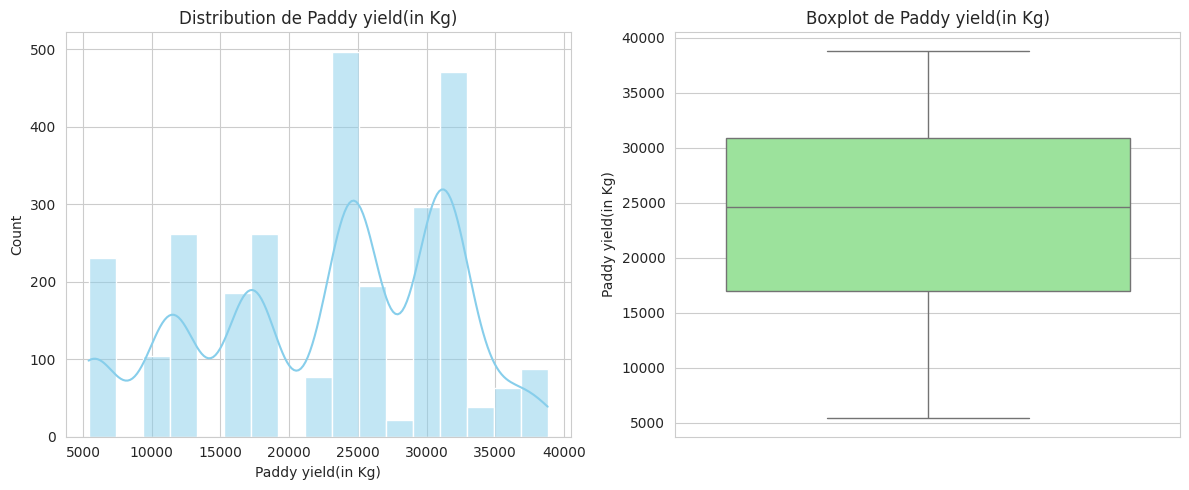

In [9]:
# Analyse rapide de la variable cible pendant l'EDA
target = 'Paddy yield(in Kg)'
"""
Rendement du riz en kilogrammes par parcelle.
C’est une variable continue → donc problème principal est un problème de régression.
"""
print(f"Variable cible : {target}")
print(f"Type : {df[target].dtype}")
print(f"Valeurs manquantes : {df[target].isnull().sum()}")
print("\nStatistiques descriptives :")
print(df[target].describe())

# Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[target], kde=True, color='skyblue')
plt.title(f'Distribution de {target}')
plt.xlabel(target)

plt.subplot(1, 2, 2)
sns.boxplot(y=df[target], color='lightgreen')
plt.title(f'Boxplot de {target}')

plt.tight_layout()
plt.show()

`Histogramme (gauche) : La distribution est bimodale, avec deux pics principaux autour de 25 000 kg et 32 000 kg. Cela suggère deux groupes distincts de rendements.`




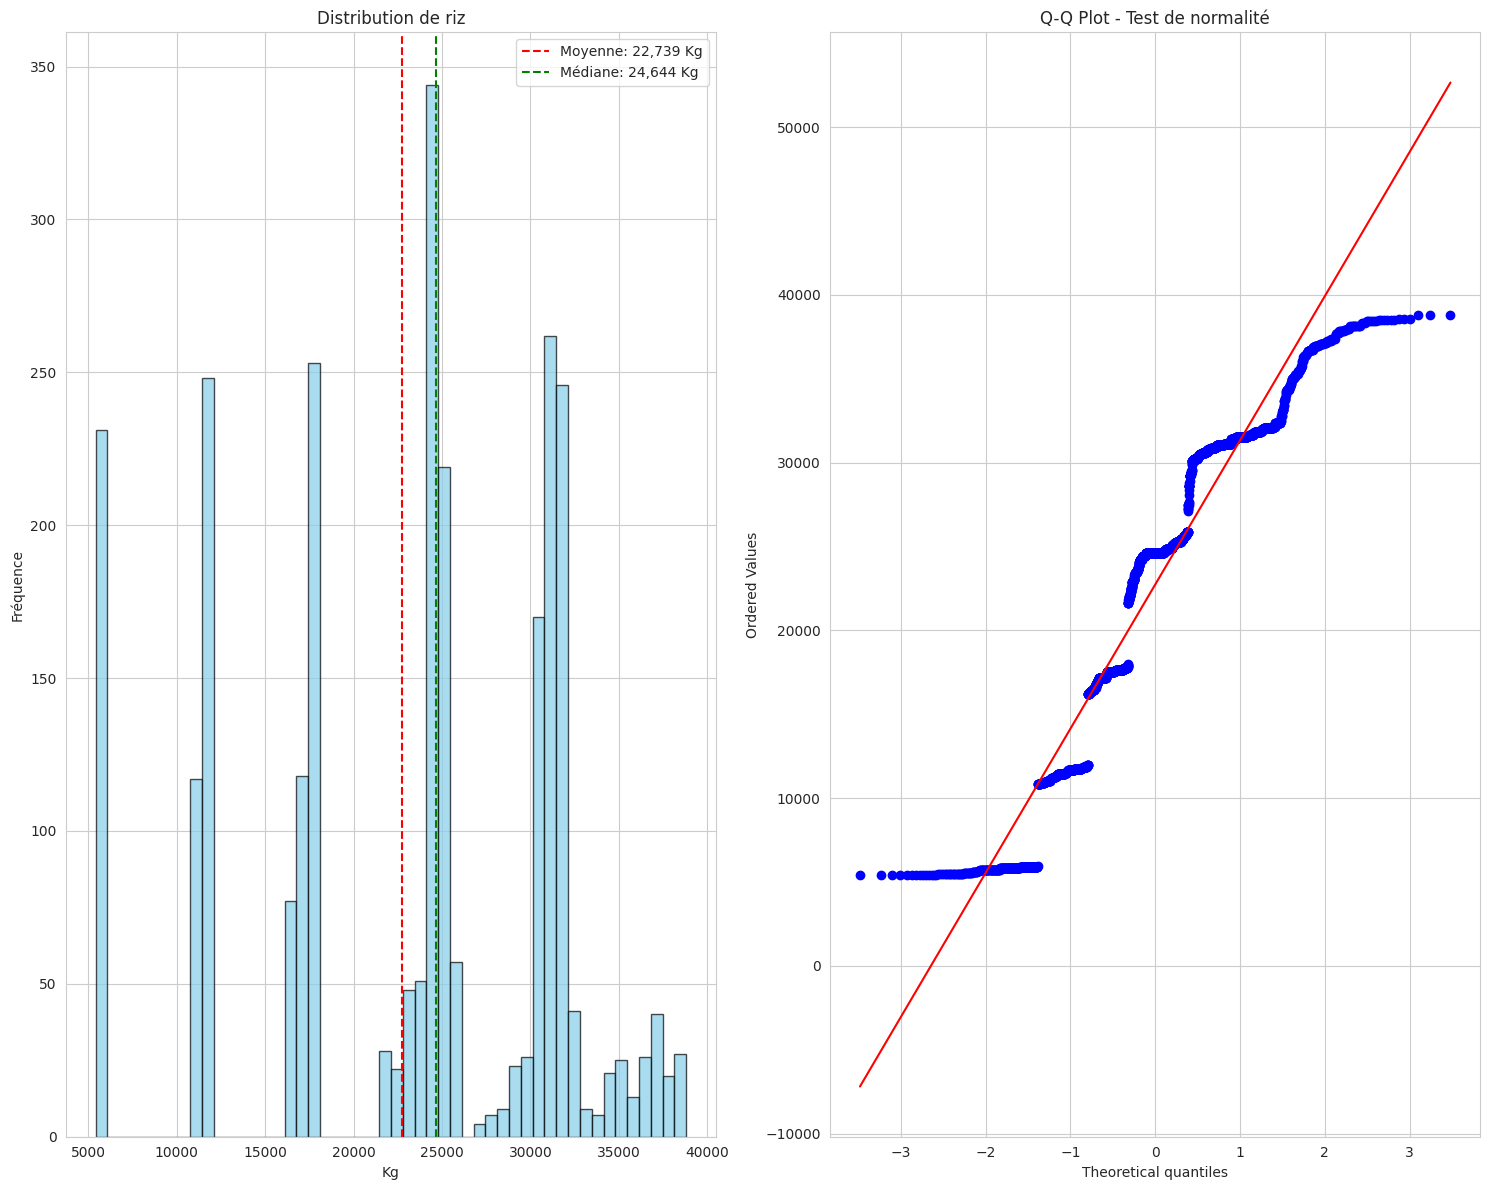

In [10]:
# Visualisation de la distribution de paddy
fig, axes = plt.subplots(1, 2, figsize=(15, 12))

# Histogramme
axes[0].hist(df[target], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Moyenne: {df[target].mean():,.0f} Kg')
axes[0].axvline(df[target].median(), color='green', linestyle='--', label=f'Médiane: {df[target].median():,.0f} Kg')
axes[0].set_xlabel('Kg')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de riz')
axes[0].legend()


# Q-Q plot pour tester la normalité
stats.probplot(df[target], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot - Test de normalité')

plt.tight_layout()
plt.show()

- **Histogramme (gauche)** : La distribution est bimodale (deux pics), avec une moyenne (22 738.686626 kg) inférieure à la médiane (24 644 kg), ce qui suggère une légère asymétrie à gauche.
- **Q-Q Plot (droite)** : Les points bleus ne suivent pas la ligne rouge (distribution normale). Ils forment des paliers et s'écartent nettement, indiquant que les données ne sont pas normalement distribuées.


Top 12 variables sélectionnées pour la corrélation :
['Paddy yield(in Kg)', 'Urea_40Days', 'LP_nurseryarea(in Tonnes)', 'LP_Mainfield(in Tonnes)', 'Nursery area (Cents)', 'Hectares ', 'Pest_60Day(in ml)', 'Potassh_50Days', 'Micronutrients_70Days', 'Weed28D_thiobencarb', 'DAP_20days', 'Seedrate(in Kg)', 'Trash(in bundles)']


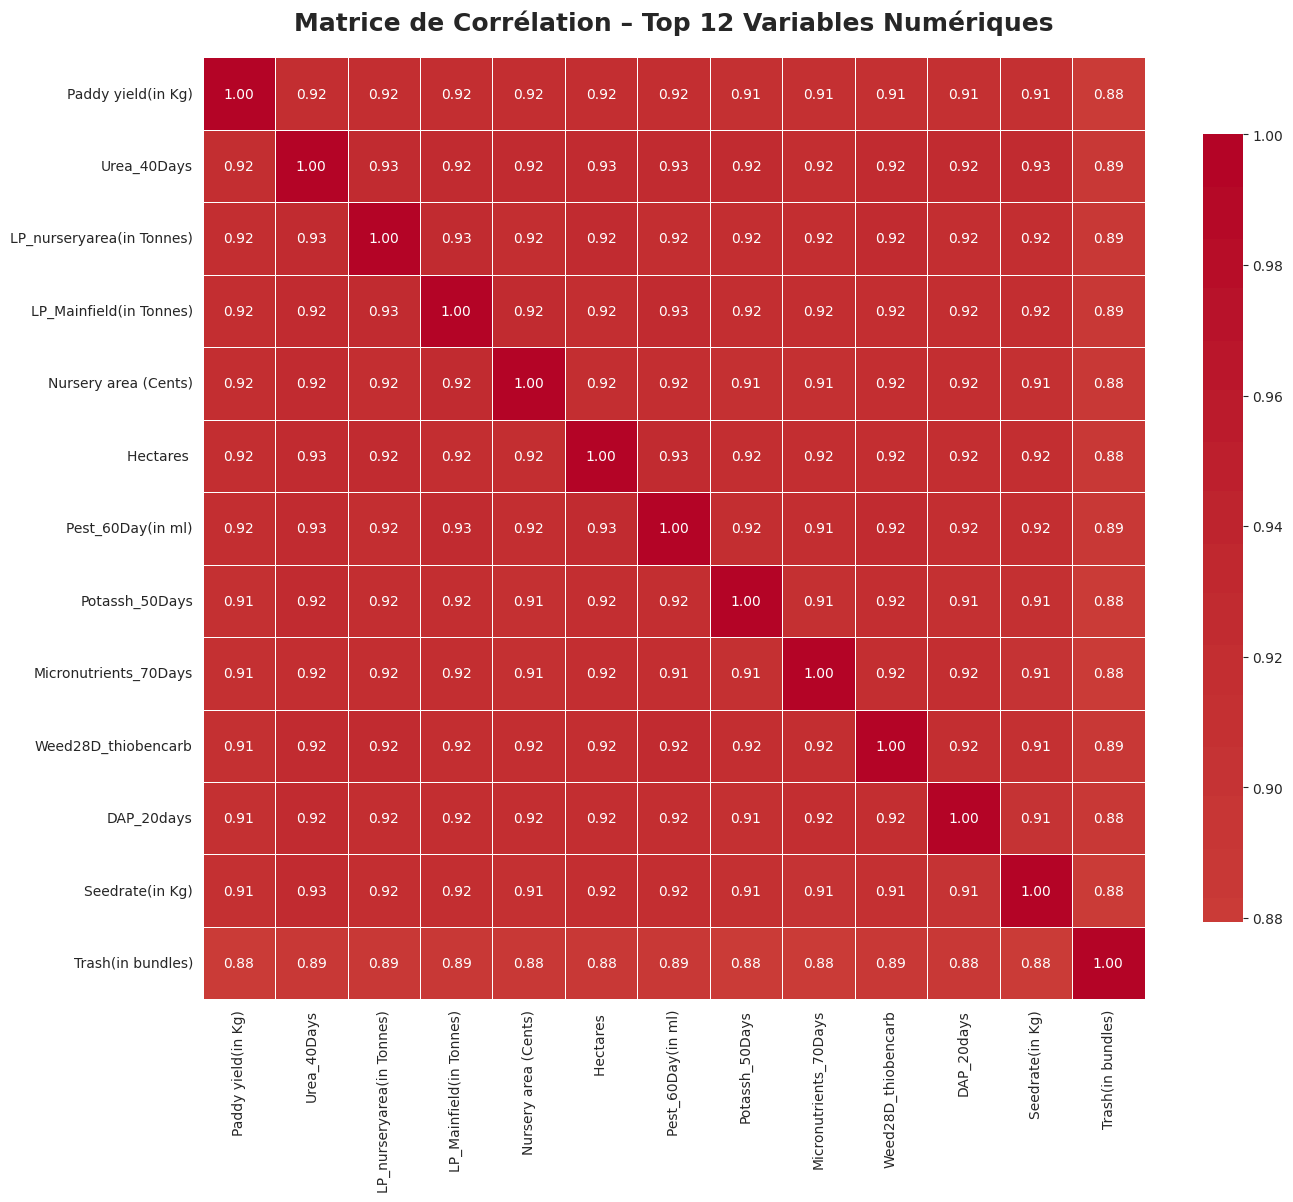

In [11]:
target = 'Paddy yield(in Kg)'

# ========================================
# 1. Sélection des 12 variables les plus corrélées avec la cible
# ========================================
# Corrélation de toutes les variables numériques avec la cible
target_corr = df[numeric_features].corr()[target].drop(target)

# Sélection des 12 variables les plus corrélées (valeur absolue)
top_12_features = target_corr.abs().sort_values(ascending=False).head(12).index.tolist()

# Ajouter la cible à la liste
selected_features = [target] + top_12_features

print("\nTop 12 variables sélectionnées pour la corrélation :")
print(selected_features)

# ========================================
# 2. Matrice de corrélation pour les 12 variables
# ========================================
corr_matrix = df[selected_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    mask=np.abs(corr_matrix) < 0.01  # Masque les très faibles corrélations
)
plt.title('Matrice de Corrélation – Top 12 Variables Numériques',
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [12]:
# ========================================
# 3. Corrélation avec la variable cible
# ========================================
print("\n" + "="*80)
print("CORRÉLATION AVEC LA VARIABLE CIBLE : Paddy yield(in Kg)")
print("="*80)

# Corrélations triées par valeur absolue
target_corr_selected = corr_matrix[target].drop(target)
target_corr_abs = target_corr_selected.abs().sort_values(ascending=False)

# Affichage des top 12 corrélations
print(pd.DataFrame({
    'Variable': target_corr_abs.index,
    'Corrélation': target_corr_selected[target_corr_abs.index].round(3)
}).to_string(index=False))



CORRÉLATION AVEC LA VARIABLE CIBLE : Paddy yield(in Kg)
                 Variable  Corrélation
              Urea_40Days        0.921
LP_nurseryarea(in Tonnes)        0.919
  LP_Mainfield(in Tonnes)        0.918
     Nursery area (Cents)        0.917
                Hectares         0.917
        Pest_60Day(in ml)        0.915
           Potassh_50Days        0.914
    Micronutrients_70Days        0.913
      Weed28D_thiobencarb        0.913
               DAP_20days        0.910
          Seedrate(in Kg)        0.908
        Trash(in bundles)        0.881


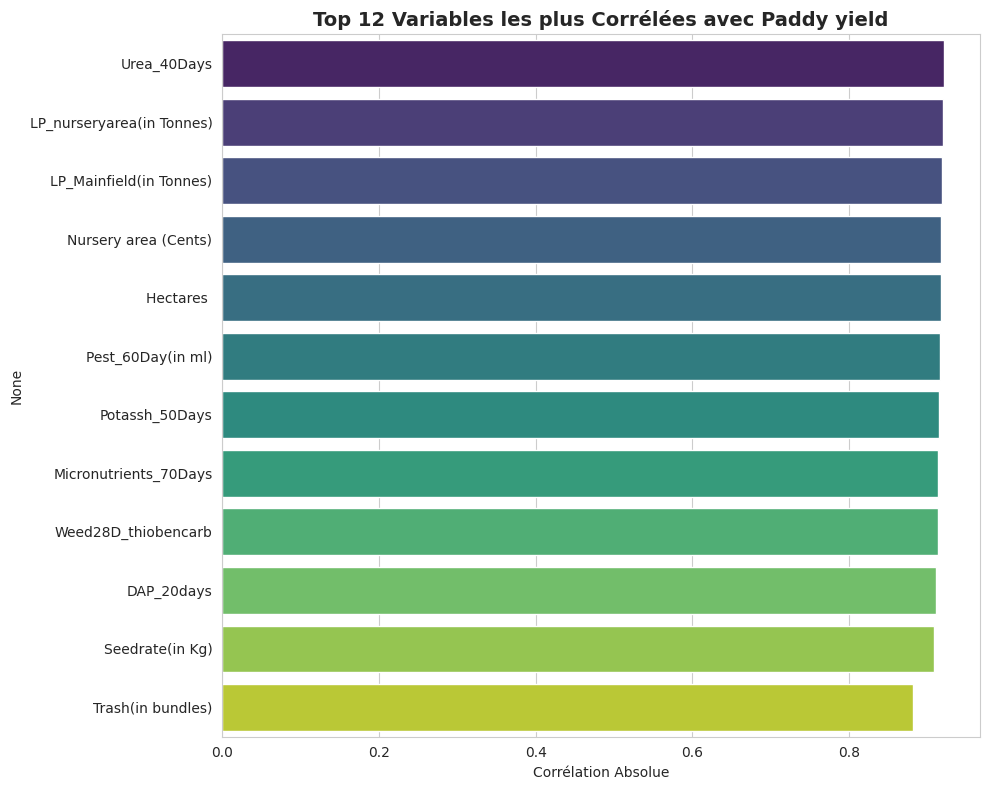

In [13]:
# ========================================
# 4. Barplot des top corrélations
# ========================================
plt.figure(figsize=(10, 8))
sns.barplot(
    x=target_corr_abs.values,
    y=target_corr_abs.index,
    palette='viridis'
)
plt.title('Top 12 Variables les plus Corrélées avec Paddy yield',
          fontsize=14, fontweight='bold')
plt.xlabel('Corrélation Absolue')
plt.tight_layout()
plt.show()


EXPLORATION DES VARIABLES CATÉGORIQUES
ANALYSE DES VARIABLES CATÉGORIQUES:
--------------------------------------
                  Variable  Valeurs_Uniques  Valeurs_Manquantes          Mode  \
0                Agriblock                6                   0  sankarapuram   
1                  Variety                3                   0       ponmani   
2               Soil Types                2                   0          clay   
3                  Nursery                2                   0           dry   
4    Wind Direction_D1_D30                6                   0           sse   
5   Wind Direction_D31_D60                5                   0             w   
6   Wind Direction_D61_D90                5                   0            se   
7  Wind Direction_D91_D120                6                   0            nw   

   Fréq_Mode  
0        795  
1       1197  
2       1623  
3       1640  
4        797  
5       1206  
6       1078  
7        792  

IMPACT DES VARIABLE

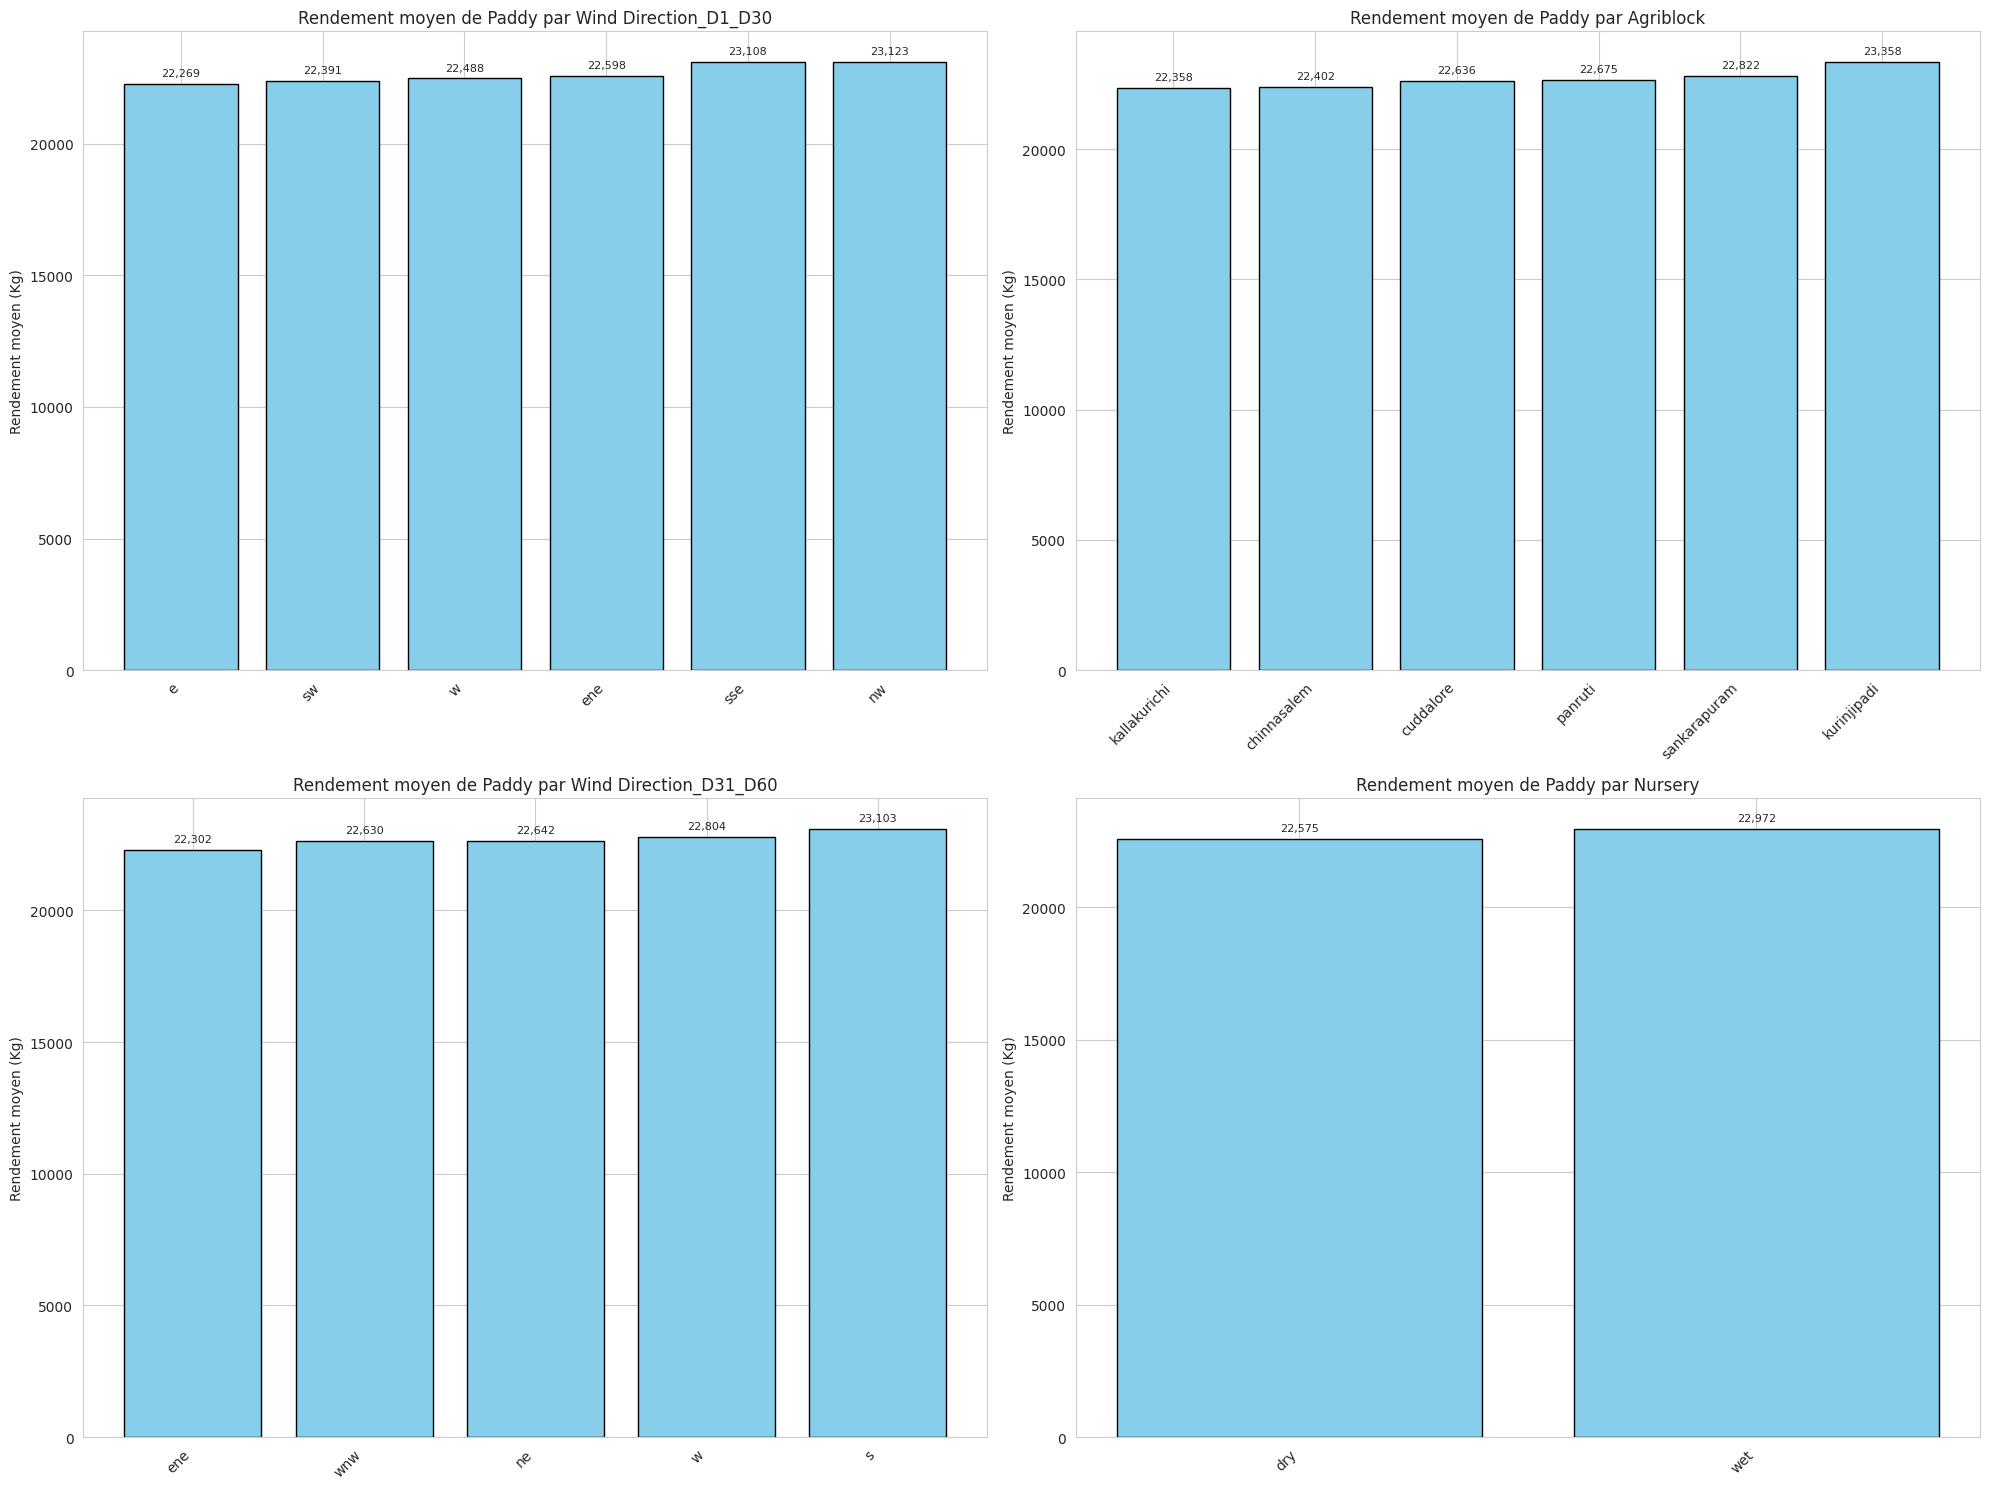

In [14]:
# ================================================================
# 6. EXPLORATION DES VARIABLES CATÉGORIQUES
# ================================================================

print("\n" + "="*60)
print("EXPLORATION DES VARIABLES CATÉGORIQUES")
print("="*60)

# Analyse des variables catégoriques
categorical_analysis = pd.DataFrame({
    'Variable': categorical_features,
    'Valeurs_Uniques': [df[col].nunique() for col in categorical_features],
    'Valeurs_Manquantes': [df[col].isnull().sum() for col in categorical_features],
    'Mode': [df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A' for col in categorical_features],
    'Fréq_Mode': [df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0 for col in categorical_features]
})

print("ANALYSE DES VARIABLES CATÉGORIQUES:")
print("-" * 38)
print(categorical_analysis.head(10))

# ================================================================
# Impact des variables catégoriques sur le rendement en paddy
# ================================================================
print("\nIMPACT DES VARIABLES CATÉGORIQUES SUR LE PADDY YIELD:")
print("-" * 60)

categorical_impact = {}
for col in categorical_features:
    if df[col].notna().sum() > 0:  # Seulement si la variable a des valeurs non-null
        grouped = df.groupby(col)[target].agg(['mean', 'count']).reset_index()
        grouped = grouped[grouped['count'] >= 5]  # Au moins 5 observations
        if len(grouped) > 1:
            yield_variance = grouped['mean'].var()
            categorical_impact[col] = yield_variance

impact_sorted = sorted(categorical_impact.items(), key=lambda x: x[1], reverse=True)

print("Variables avec le plus d'impact sur le Paddy Yield (variance des moyennes):")
for var, impact in impact_sorted[:10]:
    print(f"{var}: {impact:,.2f} Kg^2")

# ================================================================
# Visualisation de l'impact des principales variables catégoriques
# ================================================================
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

top_categorical = [var for var, _ in impact_sorted[:4]]  # Top 4 variables

for i, var in enumerate(top_categorical):
    if var in df.columns:
        # Calculer les moyennes par catégorie
        grouped = df.groupby(var)[target].agg(['mean', 'count']).reset_index()
        grouped = grouped[grouped['count'] >= 5].sort_values('mean', ascending=True)

        bars = axes[i].bar(range(len(grouped)), grouped['mean'], color='skyblue', edgecolor='black')
        axes[i].set_xticks(range(len(grouped)))
        axes[i].set_xticklabels(grouped[var], rotation=45, ha='right')
        axes[i].set_ylabel('Rendement moyen (Kg)')
        axes[i].set_title(f'Rendement moyen de Paddy par {var}')

        # Ajouter les valeurs sur les barres
        for j, bar in enumerate(bars):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                         f'{height:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [15]:
# ================================================================
# 7. ANALYSE SPÉCIFIQUE DES BLOCS AGRICOLES (AGRIBLOCK)
# ================================================================

def categorical_target_analysis(df, categorical_col, target_col, top_n=10):
    """
    Analyse une variable catégorielle par rapport à une variable cible continue.

    Affiche :
    - Tableau des statistiques (moyenne, médiane, écart-type, nombre)
    - Barplot du top_n catégories par moyenne
    - Scatter plot du nombre d'échantillons vs moyenne
    - Annoter les top catégories

    Parameters:
    -----------
    df : pd.DataFrame
        Dataframe contenant les colonnes.
    categorical_col : str
        Nom de la variable catégorielle.
    target_col : str
        Nom de la variable cible continue.
    top_n : int
        Nombre de catégories à afficher dans le tableau et les annotations.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    print("\n" + "="*60)
    print(f"ANALYSE DE '{categorical_col}' PAR RAPPORT À '{target_col}'")
    print("="*60)

    # Calcul des statistiques
    stats_df = df.groupby(categorical_col).agg({
        target_col: ['mean', 'median', 'count', 'std']
    }).round(2)
    stats_df.columns = ['Moyenne', 'Médiane', 'Nb', 'Écart_Type']
    stats_df = stats_df.sort_values('Moyenne', ascending=False)

    print(f"STATISTIQUES PAR {categorical_col.upper()} (Top {top_n}):")
    print("-"*35)
    display(stats_df.head(top_n))

    # Visualisations
    plt.figure(figsize=(15, 10))

    # Barplot du rendement moyen
    plt.subplot(2, 1, 1)
    plt.bar(range(len(stats_df)), stats_df['Moyenne'], color='lightgreen', edgecolor='black')
    plt.xticks(range(len(stats_df)), stats_df.index, rotation=45, ha='right')
    plt.ylabel(f'Moyenne de {target_col} (Kg)')
    plt.title(f'Moyenne de {target_col} par {categorical_col}')
    plt.grid(axis='y')

    # Scatter plot : nombre d'échantillons vs moyenne
    plt.subplot(2, 1, 2)
    plt.scatter(stats_df['Nb'], stats_df['Moyenne'], s=100, alpha=0.7, color='orange')
    plt.xlabel('Nombre d\'observations')
    plt.ylabel(f'Moyenne de {target_col} (Kg)')
    plt.title(f'Relation entre nombre d\'observations et moyenne de {target_col} par {categorical_col}')

    # Annoter les top_n catégories
    for i, cat in enumerate(stats_df.index[:top_n]):
        plt.annotate(cat,
                     (stats_df.loc[cat, 'Nb'], stats_df.loc[cat, 'Moyenne']),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.grid()
    plt.tight_layout()
    plt.show()

    return stats_df


ANALYSE DE 'Agriblock' PAR RAPPORT À 'Paddy yield(in Kg)'
STATISTIQUES PAR AGRIBLOCK (Top 10):
-----------------------------------


,Moyenne,Médiane,Nb,Écart_Type
Agriblock,,,,
kurinjipadi,23358.47,24724.0,441,8904.44
sankarapuram,22822.47,24644.0,795,8729.80
panruti,22675.08,24644.0,387,9071.95
cuddalore,22636.49,24644.0,402,8887.31
chinnasalem,22401.80,24644.0,377,9032.09
kallakurichi,22358.26,24644.0,387,8794.12


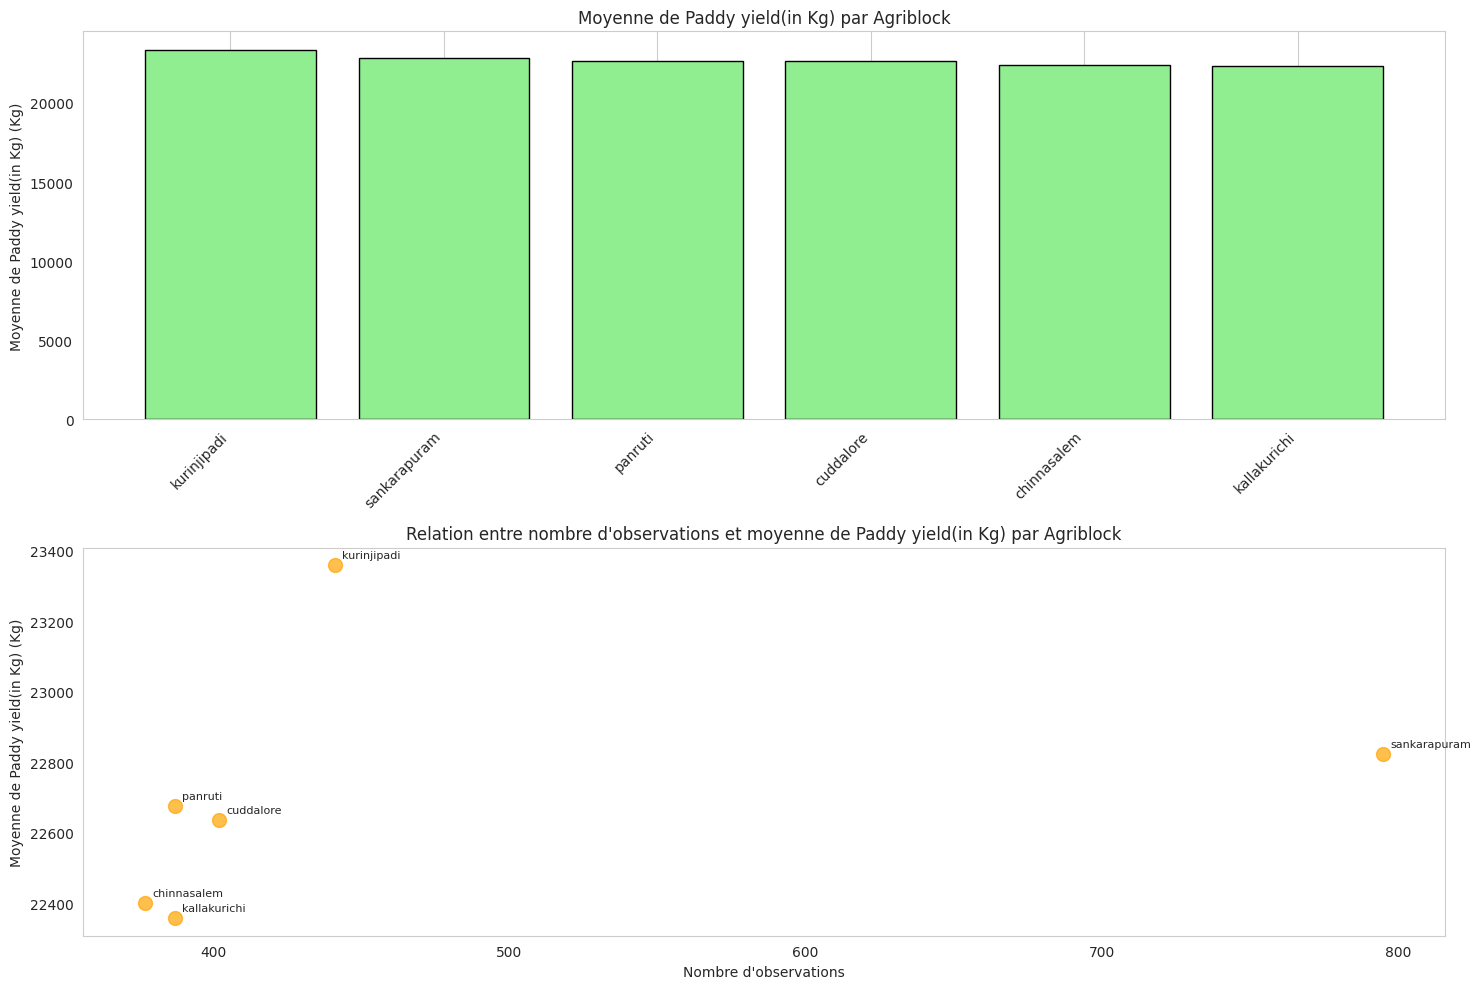


ANALYSE DE 'Variety' PAR RAPPORT À 'Paddy yield(in Kg)'
STATISTIQUES PAR VARIETY (Top 10):
-----------------------------------


,Moyenne,Médiane,Nb,Écart_Type
Variety,,,,
delux ponni,22854.31,24644.0,918,9050.54
ponmani,22684.35,24644.0,1197,8796.63
co_43,22677.72,24644.0,674,8787.07


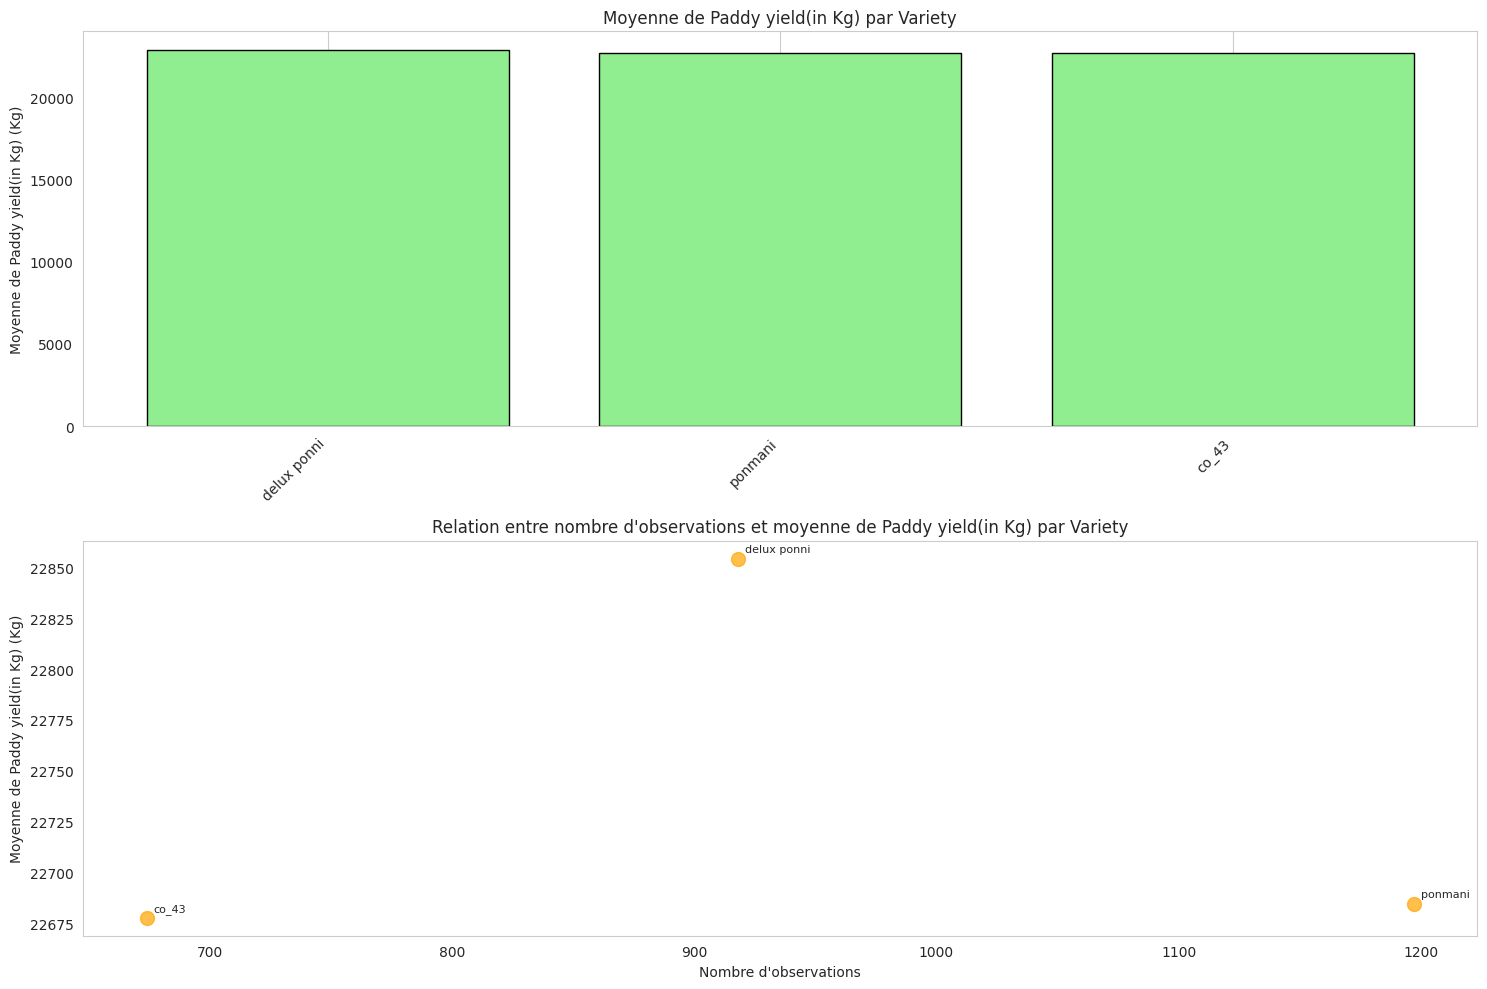


ANALYSE DE 'Soil Types' PAR RAPPORT À 'Paddy yield(in Kg)'
STATISTIQUES PAR SOIL TYPES (Top 10):
-----------------------------------


,Moyenne,Médiane,Nb,Écart_Type
Soil Types,,,,
clay,22861.55,24644.0,1623,8861.29
alluvial,22567.67,24644.0,1166,8897.17


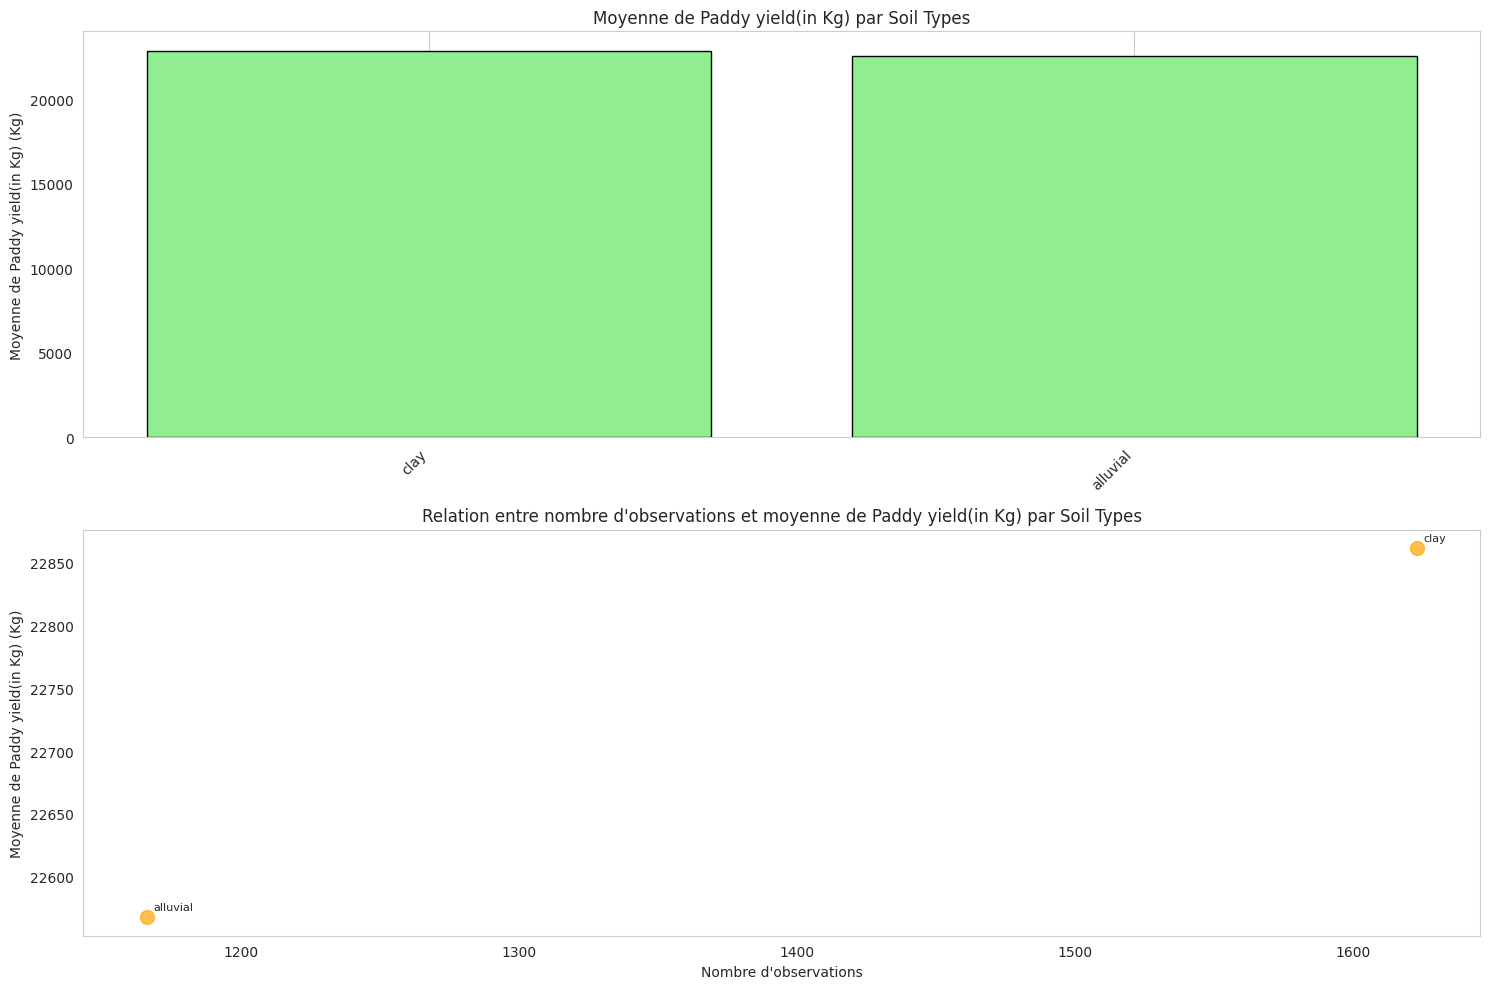

In [16]:
# Analyse par Agriblock
block_stats = categorical_target_analysis(df, 'Agriblock', 'Paddy yield(in Kg)')

# Analyse par Variety
variety_stats = categorical_target_analysis(df, 'Variety', 'Paddy yield(in Kg)')

# Analyse par Soil Types
soil_stats = categorical_target_analysis(df, 'Soil Types', 'Paddy yield(in Kg)')


- Diagramme en barres : Les rendements moyens sont très similaires pour toutes les régions, oscillant autour de 22 000 à 23 000 kg. Aucune région ne se distingue nettement des autres.
- Nuage de points : Il n'y a aucune corrélation visible entre le nombre d'observations et le rendement moyen. Par exemple, sankarapuram a beaucoup d'observations mais un rendement moyen modéré, tandis que kurinjipadi a moins d'observations mais un rendement plus élevé.


```
Conclusion : Les rendements moyens sont homogènes entre les régions, et leur niveau ne dépend pas du nombre d'observations.
```



- Les points sont dispersés sans forme particulière, ils ne forment ni une ligne ascendante (corrélation positive), ni descendante (négative), ni un cercle ou autre.

**Par exemple :**
sankarapuram a beaucoup d’observations mais un rendement moyen modéré.
kurinjipadi a moins d’observations mais un rendement plus élevé.

`Conclusion : Il n’y a pas de lien logique ou de tendance entre le nombre d’observations et le rendement moyen.`


ANALYSE TEMPORELLE AGRONOMIQUE
STATISTIQUES TEMPORELLES DES INTRANTS ET DU RENDEMENT:


,DAP_20days,Urea_40Days,Potassh_50Days,Micronutrients_70Days,Pest_60Day(in ml),Paddy yield(in Kg)
mean,150.15,101.33,38.91,56.07,2247.47,22738.69
median,160.00,108.52,41.52,60.00,2400.00,24644.00
count,2789.00,2789.00,2789.00,2789.00,2789.00,2789.00


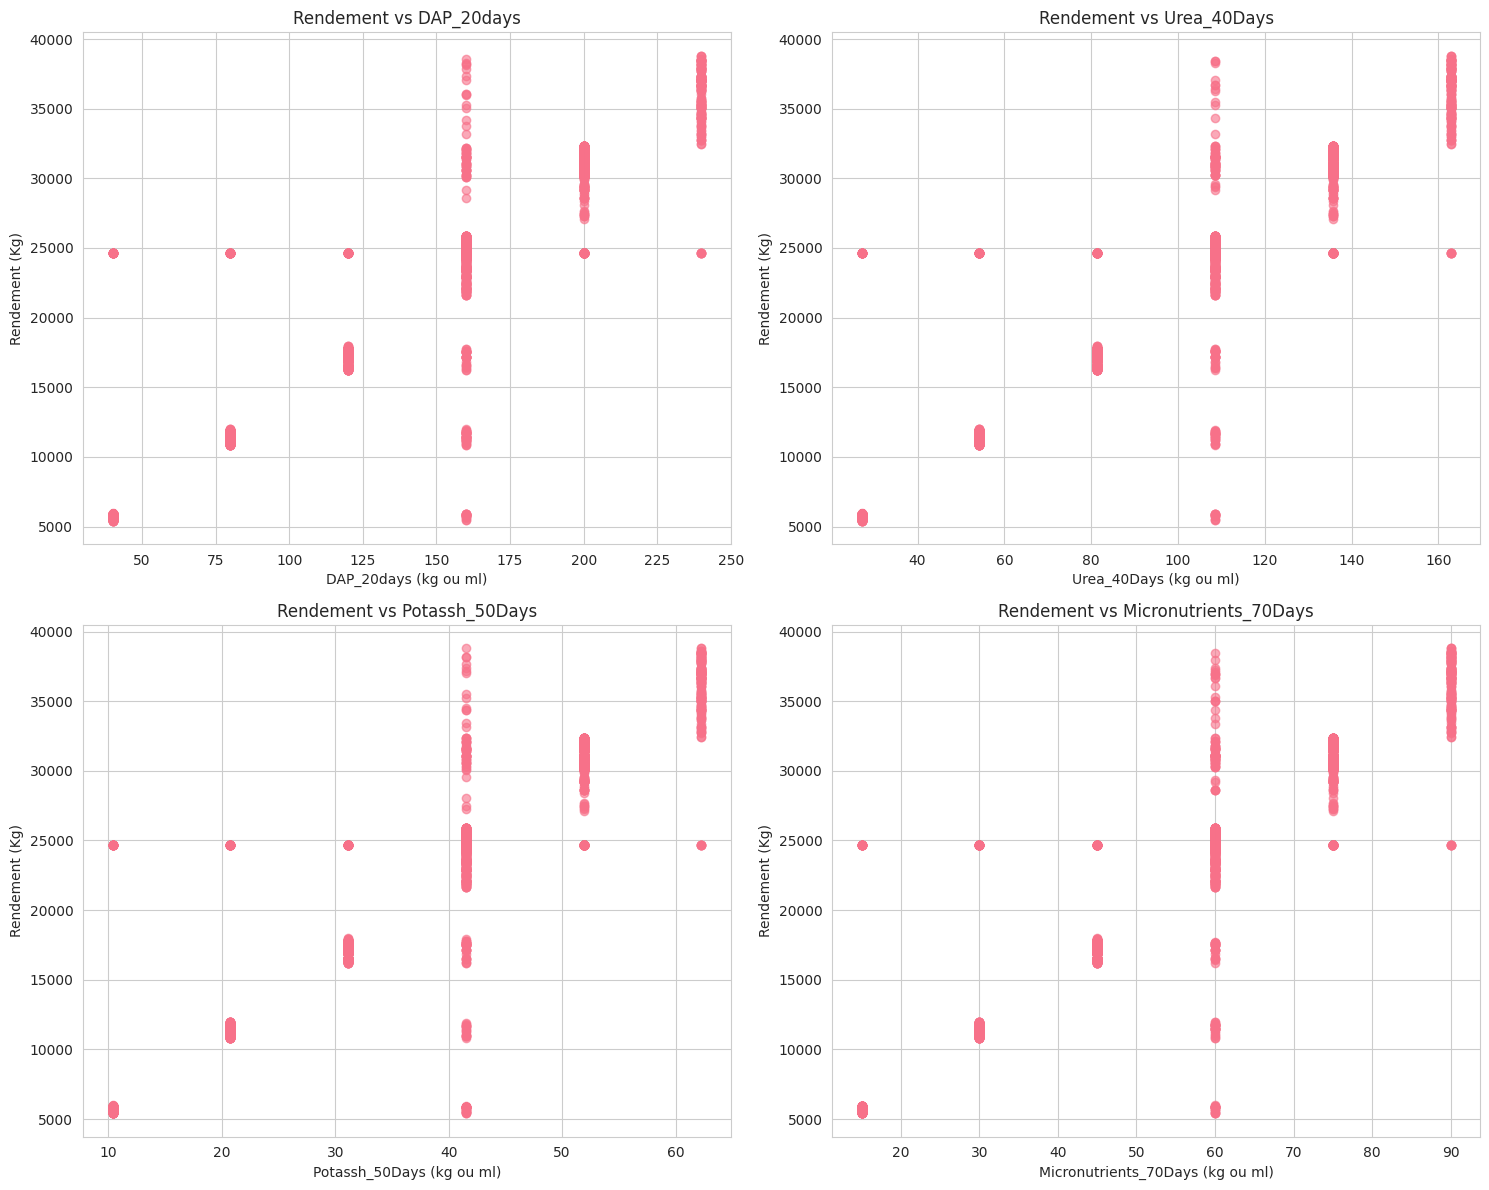

In [17]:
# ================================================================
# 8. ANALYSE TEMPORELLE AGRONOMIQUE
# ================================================================

print("\n" + "="*60)
print("ANALYSE TEMPORELLE AGRONOMIQUE")
print("="*60)

# Regrouper par périodes d'application d'intrants (en jours)
temporal_cols = ['DAP_20days', 'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days', 'Pest_60Day(in ml)']

# Statistiques sur le rendement pour chaque période
temporal_stats = df[temporal_cols + ['Paddy yield(in Kg)']].agg(['mean', 'median', 'count']).round(2)
print("STATISTIQUES TEMPORELLES DES INTRANTS ET DU RENDEMENT:")
display(temporal_stats)

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(temporal_cols[:4]):  # On prend 4 intrants principaux pour le plot
    axes[i].plot(df[col], df['Paddy yield(in Kg)'], 'o', alpha=0.6)
    axes[i].set_xlabel(f'{col} (kg ou ml)')
    axes[i].set_ylabel('Rendement (Kg)')
    axes[i].set_title(f'Rendement vs {col}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Tous les graphiques analysés montrent que :

- Chaque intrant appliqué à son stade critique (DAP à 20j, Urée à 40j, Potasse à 50j, Micro-nutriments à 70j) est corrélé positivement avec le rendement final.

`Cela suggère qu’un bon calendrier d’apport d’intrants est essentiel pour maximiser la production de riz.`


ANALYSE DE LA QUALITÉ AGRONOMIQUE ET DES TRAITEMENTS


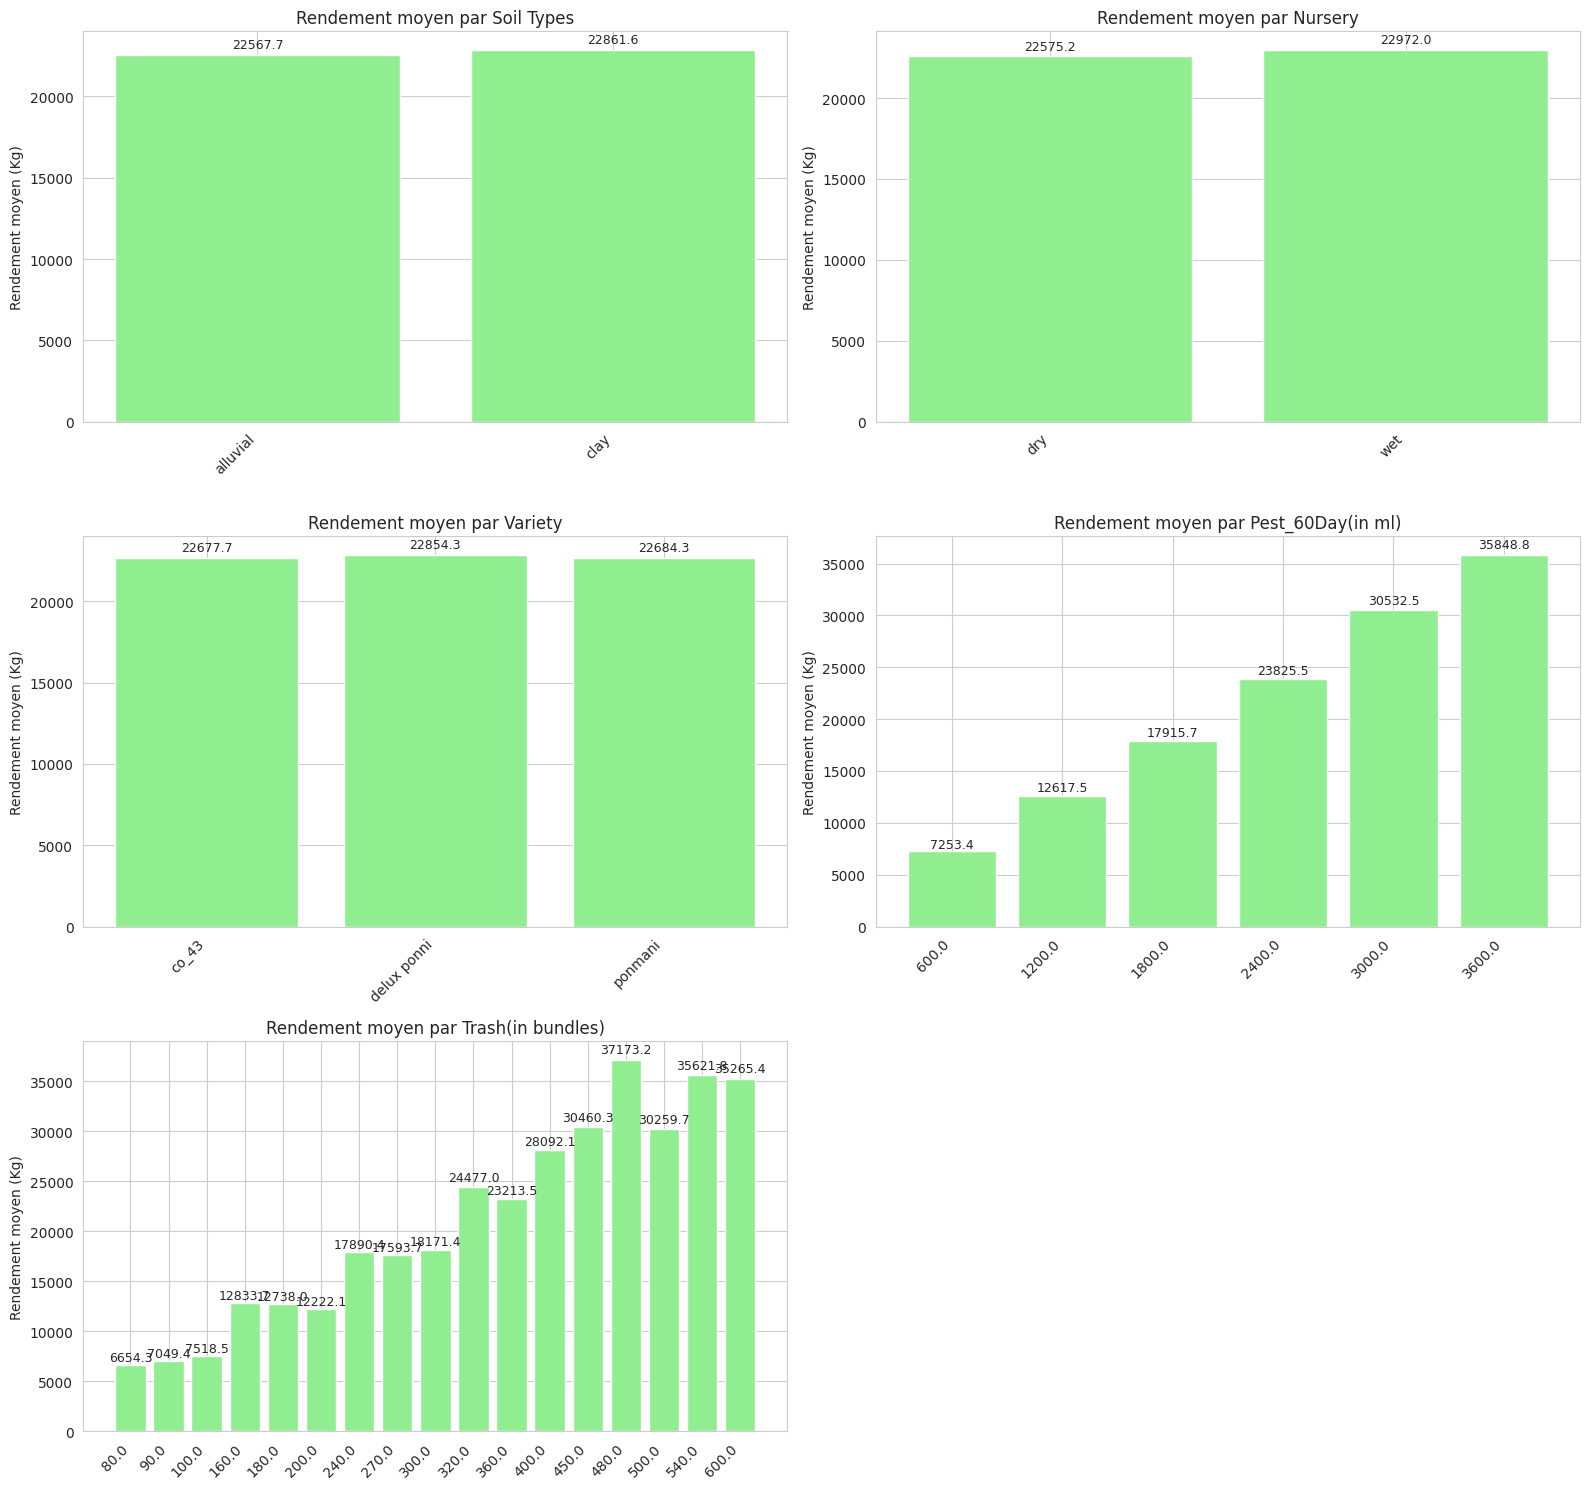

In [18]:
# ================================================================
# 9. ANALYSE DE LA QUALITÉ AGRONOMIQUE ET DES TRAITEMENTS (PADDY)
# ================================================================

print("\n" + "="*60)
print("ANALYSE DE LA QUALITÉ AGRONOMIQUE ET DES TRAITEMENTS")
print("="*60)

# Variables représentatives de la qualité
quality_vars = ['Soil Types', 'Nursery', 'Variety', 'Pest_60Day(in ml)', 'Trash(in bundles)']

n_vars = len(quality_vars)
ncols = 2
nrows = int(np.ceil(n_vars / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*5))
axes = axes.ravel()  # Pour avoir un tableau plat

for i, var in enumerate(quality_vars):
    if var in df.columns:
        grouped = df.groupby(var)['Paddy yield(in Kg)'].mean()

        bars = axes[i].bar(range(len(grouped)), grouped.values, color='lightgreen')
        axes[i].set_xticks(range(len(grouped)))
        axes[i].set_xticklabels(grouped.index, rotation=45, ha='right')
        axes[i].set_ylabel('Rendement moyen (Kg)')
        axes[i].set_title(f'Rendement moyen par {var}')

        for j, bar in enumerate(bars):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                         f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Supprimer les sous-graphes inutilisés
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Synthèse :**
- Variétés : Pas de différence notable.
- Pesticide : Rendement croissant fortement avec la dose.
- Paille (Trash) : Rendement qui s’améliore avec la quantité utilisée.

`Ces résultats suggèrent que les pratiques culturales (pesticide, gestion des résidus) ont un impact bien plus fort sur le rendement que le choix de la variété, dans ce contexte.`

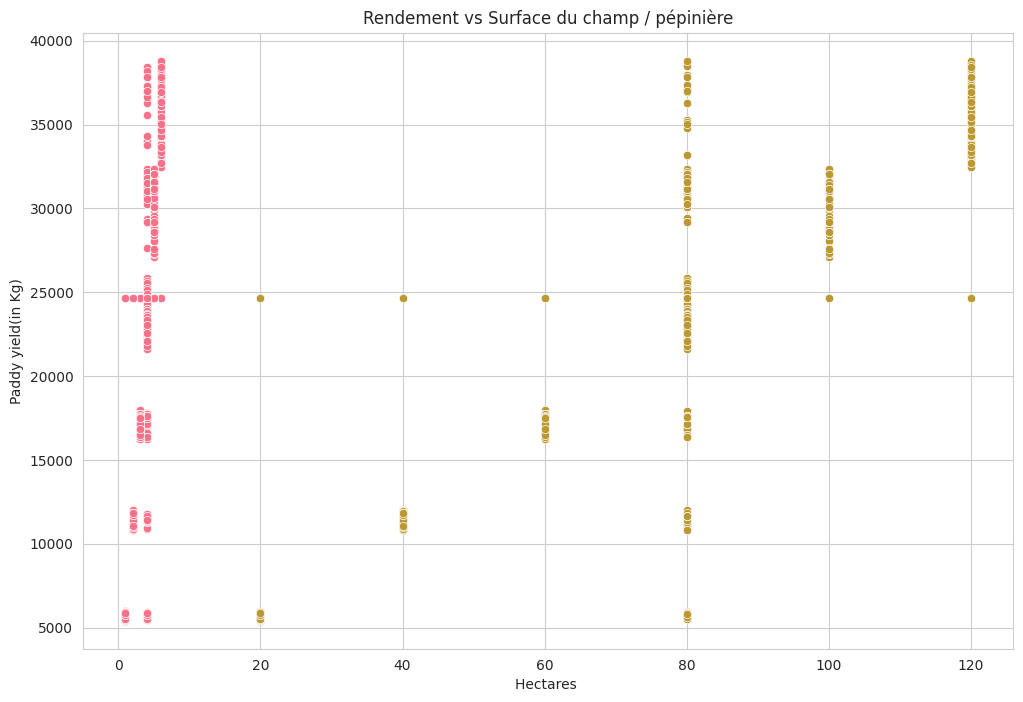

In [19]:
sns.scatterplot(x='Hectares ', y=target, data=df)
sns.scatterplot(x='Nursery area (Cents)', y=target, data=df)
plt.title("Rendement vs Surface du champ / pépinière")
plt.show()


**Conclusion pratique**
- La qualité de la gestion prime sur la taille !

- Un petit agriculteur avec de bonnes pratiques (intrants, irrigation, soin des sols) peut obtenir un meilleur rendement qu’un grand exploitant mal géré.

> C’est une bonne nouvelle pour l’agriculture familiale : même avec peu de terres, on peut atteindre des rendements élevés.



ANALYSE DES SURFACES AGRONOMIQUES ET DIMENSIONS
CORRÉLATIONS DES SURFACES AVEC LE RENDEMENT:
--------------------------------------------------
Paddy yield(in Kg)           1.000000
LP_nurseryarea(in Tonnes)    0.919191
LP_Mainfield(in Tonnes)      0.917942
Nursery area (Cents)         0.916871
Hectares                     0.916731
Trash(in bundles)            0.881326
Name: Paddy yield(in Kg), dtype: float64


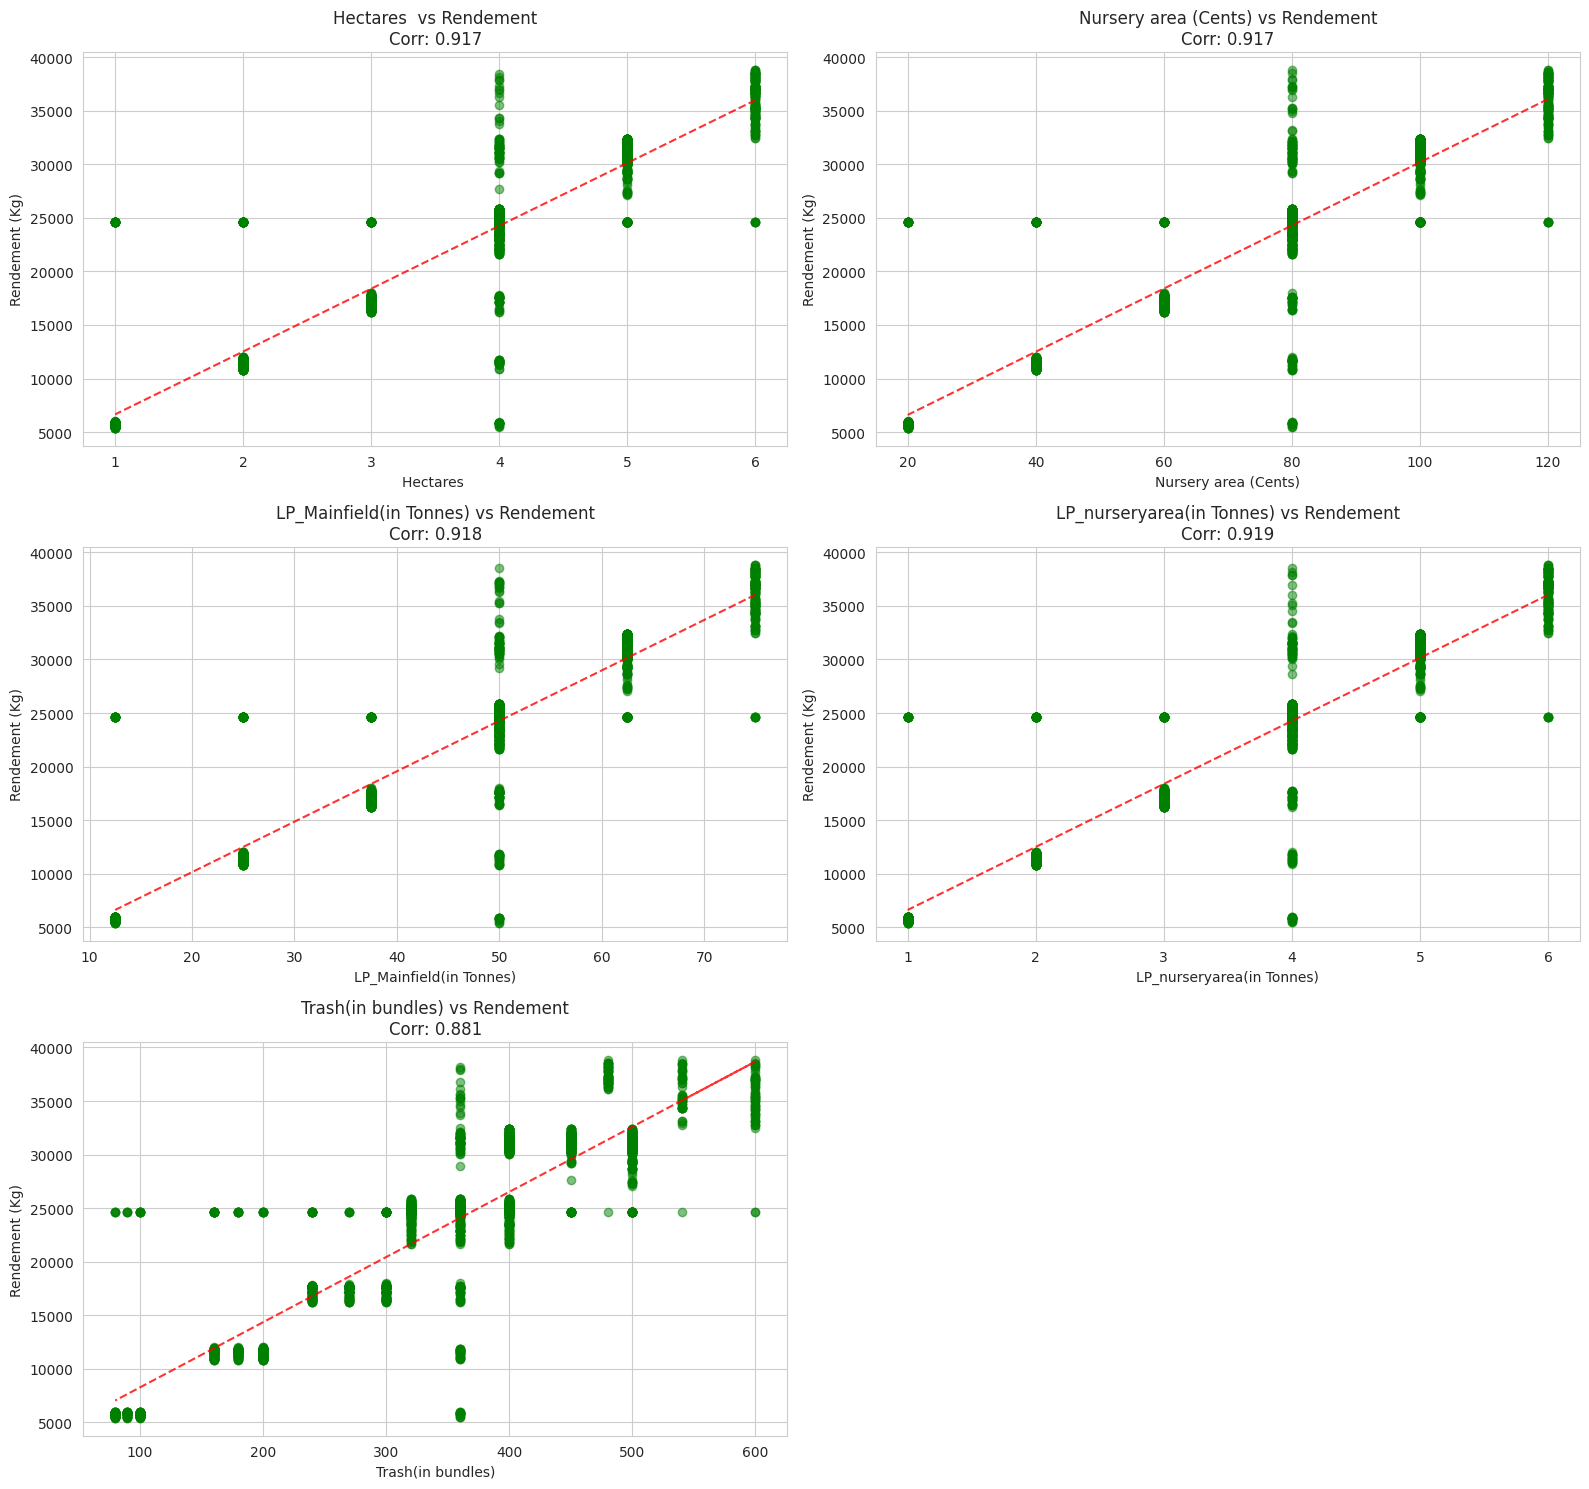

In [20]:
# ================================================================
# 10. ANALYSE DES SURFACES ET DIMENSIONS (PADDY)
# ================================================================

print("\n" + "="*60)
print("ANALYSE DES SURFACES AGRONOMIQUES ET DIMENSIONS")
print("="*60)

# Variables de surface importantes
surface_vars = ['Hectares ', 'Nursery area (Cents)', 'LP_Mainfield(in Tonnes)', 'LP_nurseryarea(in Tonnes)',
                'Trash(in bundles)']
# Corrélations avec le rendement
surface_corr = df[surface_vars + ['Paddy yield(in Kg)']].corr()['Paddy yield(in Kg)'].sort_values(ascending=False)
print("CORRÉLATIONS DES SURFACES AVEC LE RENDEMENT:")
print("-" * 50)
print(surface_corr)

# Visualisation des relations surface-rendement
n_vars = len(surface_vars)
ncols = 2
nrows = int(np.ceil(n_vars / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*5))
axes = axes.ravel()

for i, var in enumerate(surface_vars):
    axes[i].scatter(df[var], df['Paddy yield(in Kg)'], alpha=0.5, color='green')
    axes[i].set_xlabel(f'{var}')
    axes[i].set_ylabel('Rendement (Kg)')
    axes[i].set_title(f'{var} vs Rendement\nCorr: {surface_corr[var]:.3f}')

    # Ligne de régression
    valid_data = df[[var, 'Paddy yield(in Kg)']].dropna()
    if len(valid_data) > 1:
        z = np.polyfit(valid_data[var], valid_data['Paddy yield(in Kg)'], 1)
        p = np.poly1d(z)
        axes[i].plot(valid_data[var], p(valid_data[var]), "r--", alpha=0.8)

# Supprimer les axes vides si nécessaire
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Le tableau montre que :

- Hectares → Corrélation = 0.917
- Nursery area (Cents) → 0.917
- LP_Mainfield(in Tonnes) → 0.918
- LP_nurseryarea(in Tonnes) → 0.919
- Trash(in bundles) → 0.881
> Toutes ces variables sont fortement liées au rendement, presque autant que le rendement avec lui-même

**Interprétation des graphiques**

Chaque scatter plot montre :

- Une tendance ascendante nette (ligne rouge en pointillés).
- Des points bien alignés autour de la droite de régression.

`Cela confirme la forte corrélation positive.`

**Mais pourquoi ?**

La surface (en hectares ou cents) ne cause pas le rendement, le rendement est proportionnel à la surface !

- Rendement total = Rendement par unité de surface × Surface cultivée

Donc :

- Si vous cultivez 2 fois plus de surface, vous récoltez 2 fois plus de riz → rendement total plus élevé.
- Ce n’est pas parce que la terre est meilleure, mais parce qu’il y a plus de terrain productif.

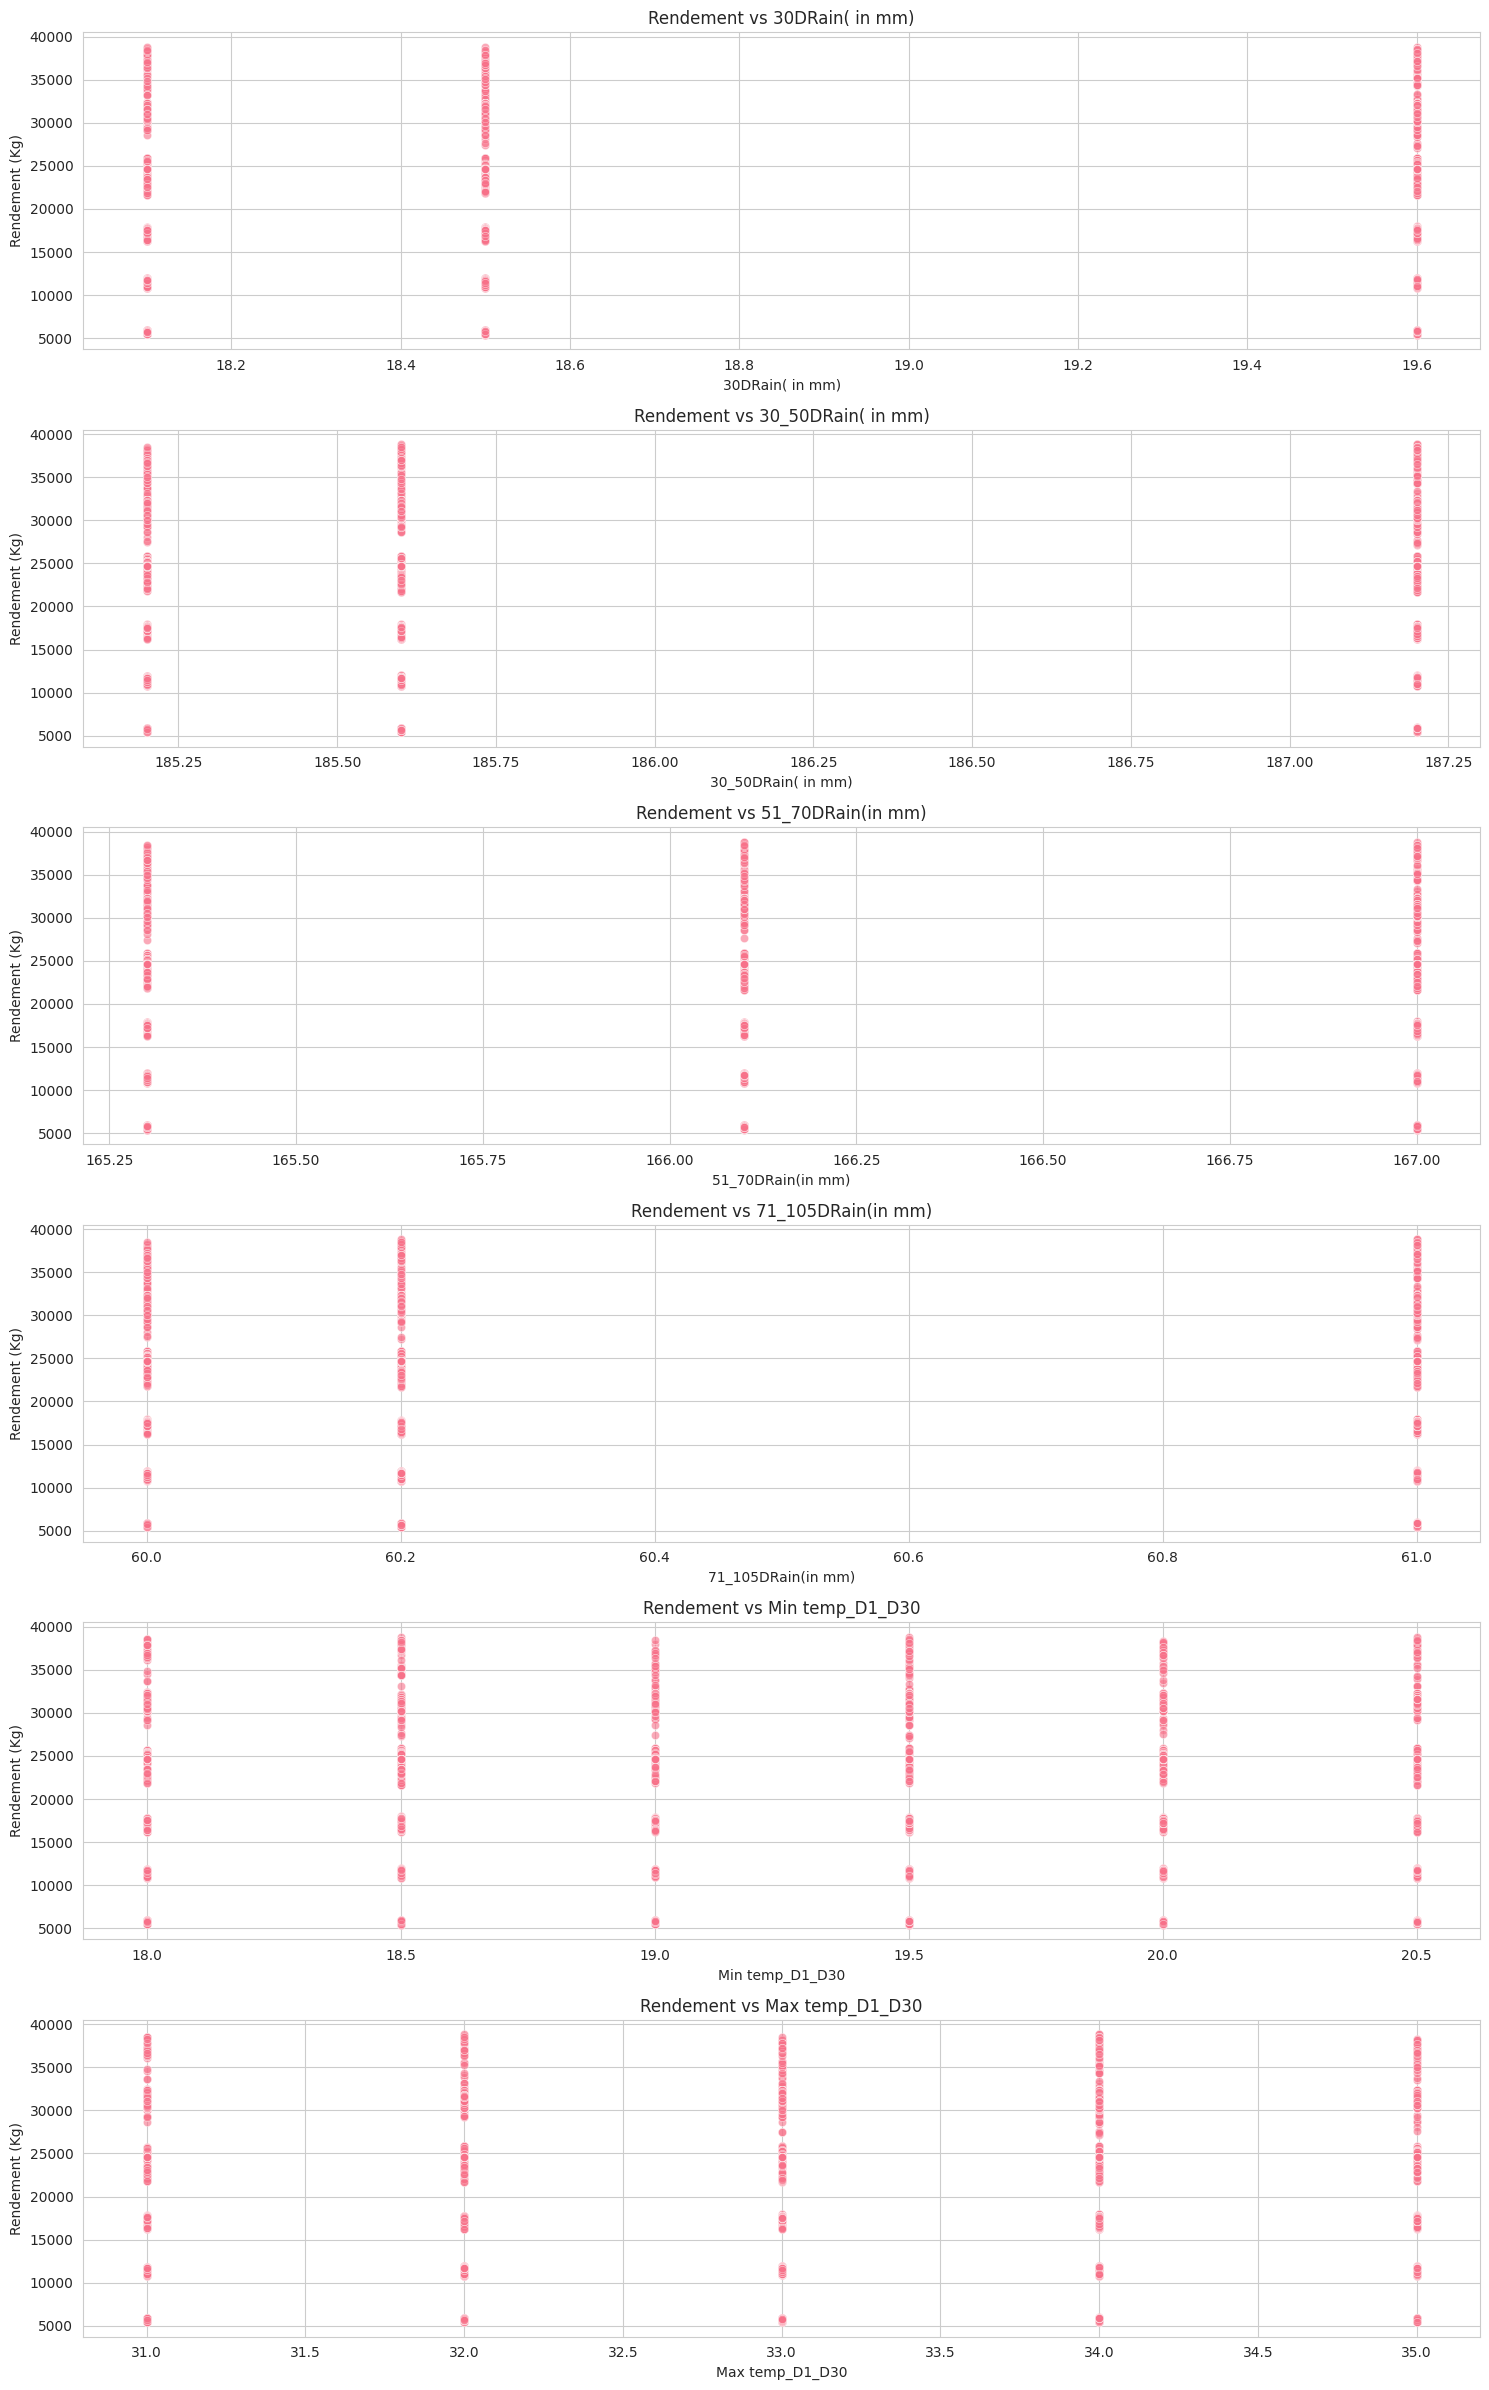

In [21]:
weather_vars = [
    '30DRain( in mm)', '30_50DRain( in mm)',
    '51_70DRain(in mm)', '71_105DRain(in mm)',
    'Min temp_D1_D30', 'Max temp_D1_D30'
]

# Nombre de variables météo
n_vars = len(weather_vars)

plt.figure(figsize=(15, 4 * n_vars))

for i, var in enumerate(weather_vars):
    plt.subplot(n_vars, 1, i + 1)
    sns.scatterplot(x=df[var], y=df[target], alpha=0.6)
    plt.xlabel(var)
    plt.ylabel('Rendement (Kg)')
    plt.title(f'Rendement vs {var}')
    plt.grid(True)

plt.tight_layout()
plt.show()

 - Ni la pluie, ni la température (min/max) ne montrent de corrélation claire avec le rendement dans ce jeu de données.

Cela suggère que :

- Les conditions climatiques sont relativement stables ou bien gérées (ex: irrigation, serres, etc.).
- Ou bien, d’autres facteurs humains (engrais, pesticide, variété, gestion des résidus) ont un impact bien plus fort sur la productivité.

`Pour améliorer le rendement, il vaut mieux se concentrer sur les pratiques agricoles contrôlables plutôt que sur les aléas climatiques.`





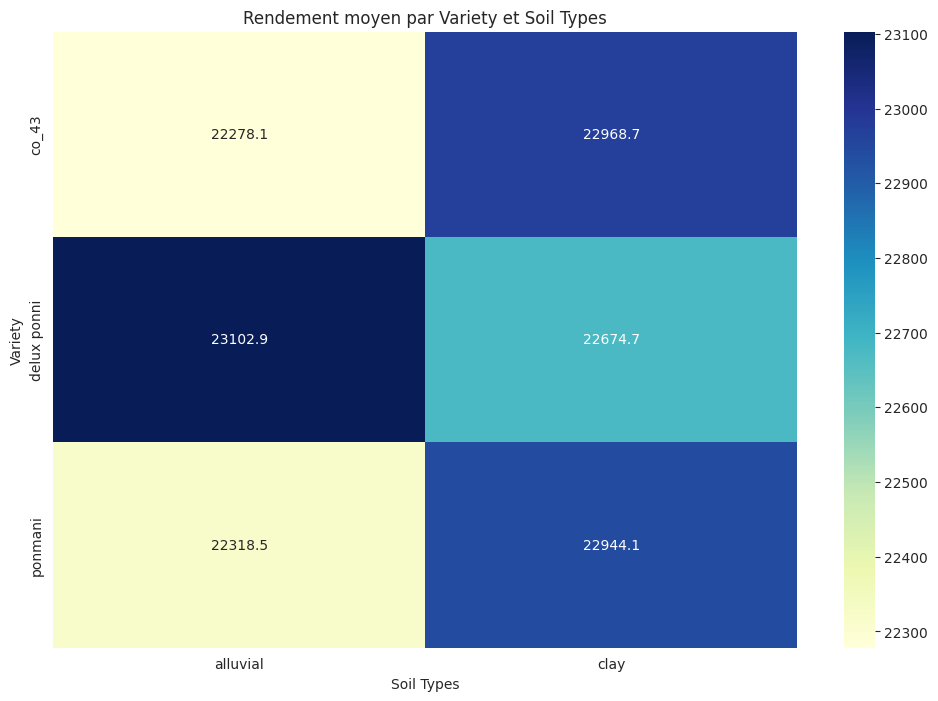

In [22]:
pivot = df.pivot_table(values=target, index='Variety', columns='Soil Types', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Rendement moyen par Variety et Soil Types")
plt.show()



**Lecture du graphique :**

 Axes :
- Vertical (Y) : les variétés → co_43, delux ponni, ponmani

- Horizontal (X) : les types de sol → alluvial (alluvionnaire), clay (argileux)

Couleurs :
- Plus la couleur est foncée (bleu foncé), plus le rendement est élevé.
- Plus elle est claire (jaune pâle), plus le rendement est faible.

La barre de couleur à droite donne l’échelle : de ~22 300 kg (clair) à ~23 100 kg (foncé).

**Observations clés :**

- La variété delux ponni sur sol alluvial donne le meilleur rendement (23 102.9 kg).
- Le sol argileux semble mieux convenir aux variétés co_43 et ponmani.
- Le sol alluvial favorise delux ponni, mais pas les autres variétés.

**Conclusion :**
- Il y a un effet d’interaction entre la variété et le type de sol.

Cela signifie que Choisir la bonne variété selon le sol peut améliorer le rendement.

**Recommandation :**
- Pour optimiser la production, adapter la variété au type de sol est une stratégie agronomique efficace, même si, globalement, les variétés avaient des rendements similaires quand on ne considérait pas le sol.





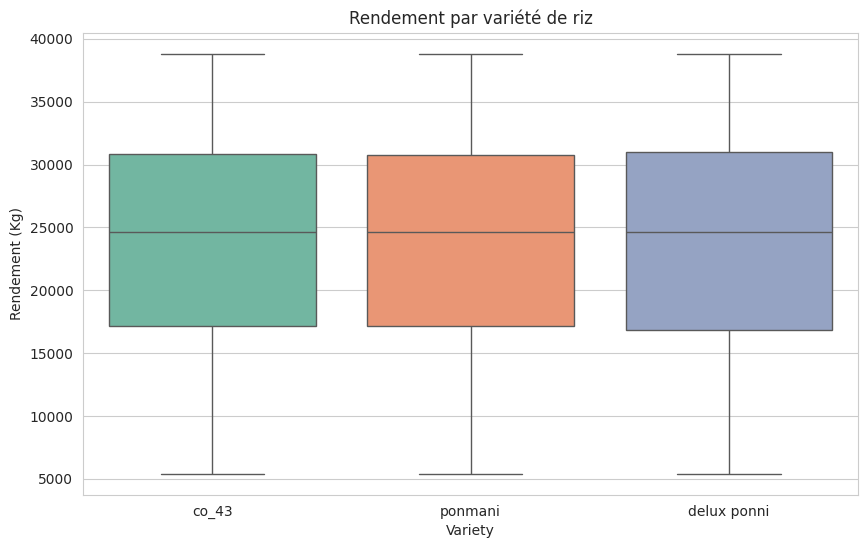

In [23]:
# Distribution du rendement par variété
# Boxplots pour comparer la dispersion et détecter les variabilités entre variétés.
plt.figure(figsize=(10,6))
sns.boxplot(x='Variety', y='Paddy yield(in Kg)', data=df, palette="Set2")
plt.title("Rendement par variété de riz")
plt.ylabel("Rendement (Kg)")
plt.show()


In [24]:
# Moyenne et écart-type par variété
# Table récapitulative pour voir quelles variétés sont les plus performantes et stables.
variety_stats = df.groupby('Variety')['Paddy yield(in Kg)'].agg(['mean','std','count']).sort_values('mean', ascending=False)
print(variety_stats)

                     mean          std  count
Variety                                      
delux ponni  22854.306100  9050.538792    918
ponmani      22684.347536  8796.628021   1197
co_43        22677.715134  8787.066551    674


**Conclusion :**
- Les trois variétés ont des rendements moyens et des dispersions très similaires.
- Le choix de la variété a un impact négligeable sur le rendement.

> Cela confirme l’analyse précédente :
→ Le choix de la variété n’a pas d’impact significatif sur le rendement final.

**Recommandation :**

Si vous devez choisir une variété, privilégiez celle qui s’adapte le mieux à votre sol (comme montré dans le heatmap précédent), pas celle qui donne le meilleur rendement "en moyenne".

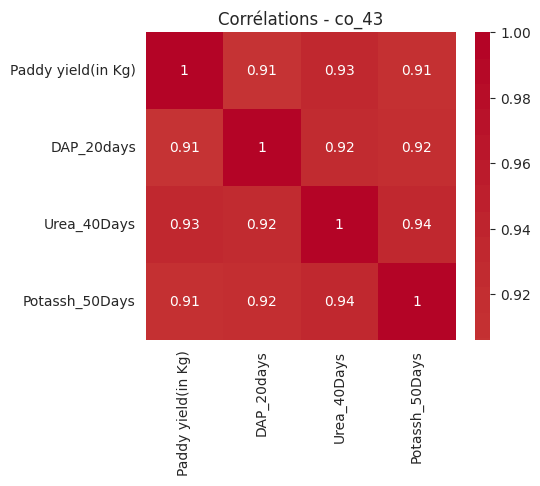

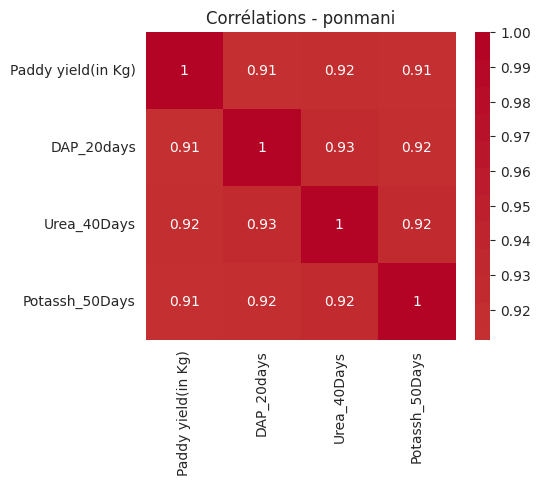

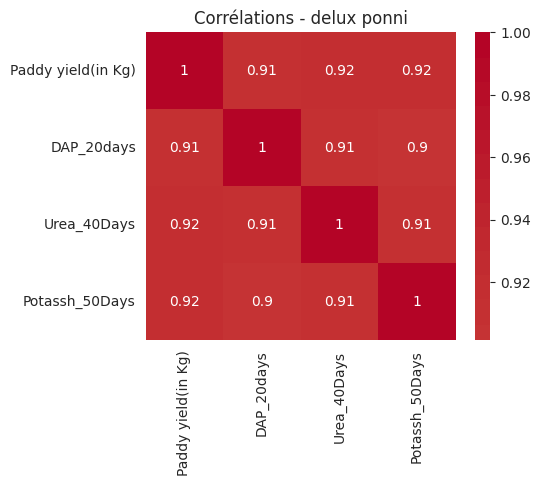

In [25]:
# Heatmap corrélations spécifiques à chaque variété
# Calculer les corrélations entre fertilisants/météo et rendement par variété pour détecter des patterns spécifiques.
for var in df['Variety'].unique():
    subset = df[df['Variety'] == var]
    corr = subset[['Paddy yield(in Kg)', 'DAP_20days','Urea_40Days','Potassh_50Days']].corr()
    plt.figure(figsize=(5,4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title(f"Corrélations - {var}")
    plt.show()

**Synthèse globale**
- La variété de riz n’influence PAS la relation entre les intrants et le rendement.

Cela renforce les conclusions précédentes :

- Le choix de la variété n’a aucun impact significatif sur le rendement final.
- L’efficacité des intrants est universelle, elle fonctionne de la même

In [26]:
# Analyse de variance (ANOVA) par variété
# Tester statistiquement si les moyennes de rendement diffèrent entre variétés.
from scipy.stats import f_oneway

groups = [df[df['Variety']==v]['Paddy yield(in Kg)'].dropna() for v in df['Variety'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA Variety: F={f_stat:.2f}, p={p_val:.4f}")
# p > 0.05, les rendements moyens ne diffèrent pas significativement entre variétés.

ANOVA Variety: F=0.12, p=0.8904


Distribution de la variable cible 'Variety':
ponmani         : 1197 échantillons (42.92%)
delux ponni     :  918 échantillons (32.92%)
co_43           :  674 échantillons (24.17%)


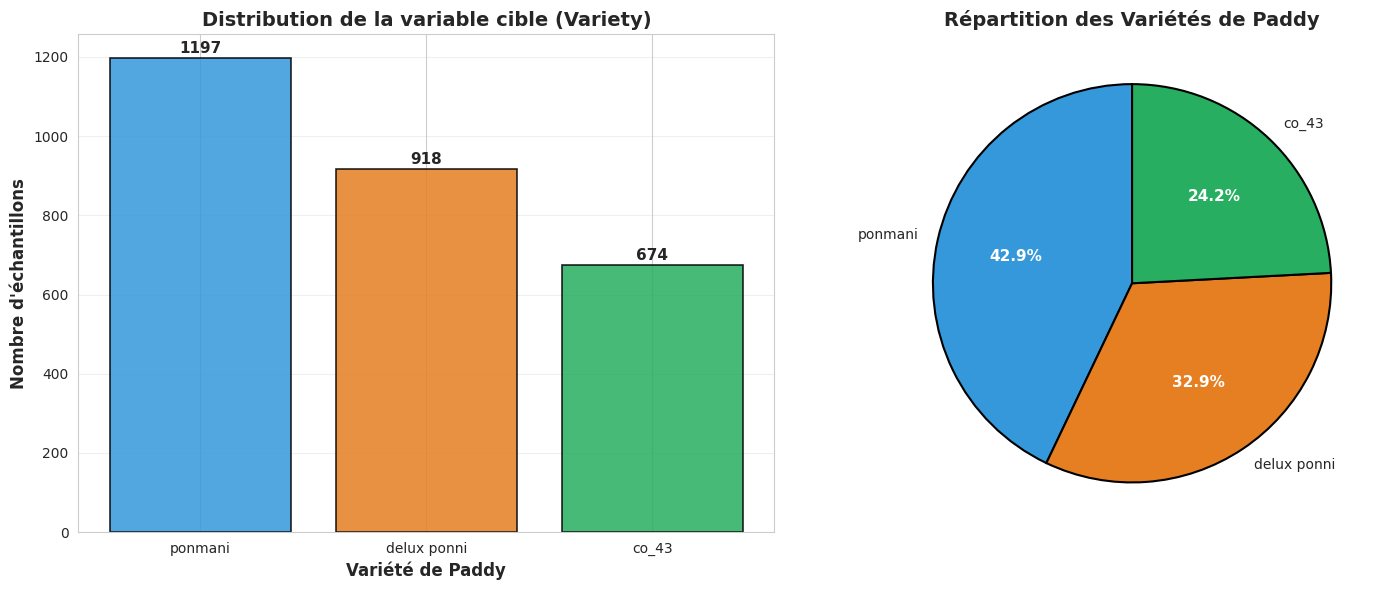

In [27]:
# Distribution de la variable cible : Variety
target_counts = df['Variety'].value_counts()
target_percentage = df['Variety'].value_counts(normalize=True) * 100

print("Distribution de la variable cible 'Variety':")
print("=" * 60)
for variety in target_counts.index:
    print(f"{variety:15} : {target_counts[variety]:4d} échantillons ({target_percentage[variety]:.2f}%)")

# Tri des variétés par ordre alphabétique ou par count pour une meilleure lisibilité
target_counts = target_counts.sort_values(ascending=False)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Bar plot
bars = axes[0].bar(target_counts.index, target_counts.values,
                   color=['#3498db', '#e67e22', '#27ae60'],
                   alpha=0.85, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Variété de Paddy', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre d\'échantillons', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution de la variable cible (Variety)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Pie chart
colors = ['#3498db', '#e67e22', '#27ae60']
wedges, texts, autotexts = axes[1].pie(target_counts.values,
                                      labels=target_counts.index,
                                      autopct='%1.1f%%',
                                      colors=colors,
                                      startangle=90,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Améliorer la lisibilité des pourcentages
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

axes[1].set_title('Répartition des Variétés de Paddy', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**1. Le rendement (Paddy yield)**

Le rendement n’est pas déterminé par un seul facteur, mais il est fortement influencé par la gestion agronomique :

**Facteurs à fort impact :**

Intrants bien dosés et appliqués au bon moment :
→ DAP à 20 jours, urée à 40 jours, potasse à 50 jours, micro-nutriments à 70 jours
→ Pesticides et recyclage de la paille (Trash)
Interaction sol–variété (effet secondaire, mais mesurable)

**Facteurs à faible ou aucun impact :**

Variété seule (sans tenir compte du sol)
Surface cultivée (le rendement total dépend de la surface, mais pas le rendement par hectare)
Conditions climatiques (pluie, température) – pas de lien clair dans ces données

**Conclusion :**

> Le rendement est maîtrisable : il dépend surtout de pratiques agricoles optimisées, et non du hasard climatique ou du choix de semence.



**2. La variété (Variety)**

Les trois variétés étudiées (co_43, ponmani, delux ponni) sont agronomiquement équivalentes :

- Rendements moyens quasi identiques (différence < 0,8 %)
Même dispersion (forte variabilité → liée à d’autres facteurs)
Même réponse aux intrants (corrélations > 0,90, identiques pour toutes)
- Aucune n’est plus stable ou productive que les autres

**Seule nuance :**
Une légère interaction avec le type de sol (ex. delux ponni sur sol alluvial donne un peu plus), mais cet effet est marginal par rapport à l’impact des intrants.